In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from matplotlib.path import Path
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import math
import re
import matplotlib.image as mpimg
from matplotlib.backends.backend_pdf import PdfPages

location = 'upper right'
linewidth = 1
size=10
style.use("ggplot")
# plt.style.use('seaborn-dark-palette')
plt.style.use('seaborn-whitegrid')

In [2]:
# Define a function to extract the network name
def extract_network_name(var_name):
    # Find the start and end positions of the tuple within the string
    start = var_name.find('(')
    end = var_name.find(')')
    if start != -1 and end != -1:
        # Extract the tuple string and split it by comma
        tuple_str = var_name[start+1:end]
        tuple_parts = tuple_str.split(',')
        # The network name is the last part of the tuple
        network_name = tuple_parts[-1].strip().replace("'", "")
        return network_name
    return None

def extract_node_number(var_name):
    # Use regular expression to find the node number
    match = re.search(r'(\d+)', var_name)
    if match:
        return int(match.group())
    return None

demand = {'Gas': {'Gas_node_3': 217.3, 'Gas_node_4': 154.9, 'Gas_node_5': 266.8, 'Gas_node_6': 17.7, 'Gas_node_7': 22.9, 'Gas_node_8': 68.6, 'Gas_node_9': 47.0, 'Gas_node_10': 13.4, 'Gas_node_11': 3.4, 'Gas_node_12': 14.2, 'Gas_node_13': 25.3, 'Gas_node_14': 11.5, 'Gas_node_15': 137.0}, 'Power': {'Power_node_9': 9.777975497, 'Power_node_10': 53.84153027, 'Power_node_11': 27.10716836, 'Power_node_12': 19.66908817, 'Power_node_13': 55.7552359, 'Power_node_14': 16.72668359, 'Power_node_15': 16.75704501, 'Power_node_16': 10.80638959, 'Power_node_17': 0.316401109, 'Power_node_18': 6.252251204, 'Power_node_19': 29.64691932, 'Power_node_20': 32.47823896, 'Power_node_21': 36.98167494, 'Power_node_22': 25.97081786, 'Power_node_23': 37.7794295, 'Power_node_24': 58.98713969, 'Power_node_25': 48.0024627, 'Power_node_26': 19.09654231, 'Power_node_27': 32.69737324, 'Power_node_28': 25.40134154, 'Power_node_29': 4.382616987, 'Power_node_30': 22.90754838, 'Power_node_31': 22.20482407, 'Power_node_32': 32.74613032, 'Power_node_33': 32.10891415, 'Power_node_34': 9.796453251, 'Power_node_35': 16.02433749, 'Power_node_36': 13.44535955, 'Power_node_37': 19.81595579, 'Power_node_38': 12.95349404, 'Power_node_39': 22.71395364, 'Power_node_40': 16.35711169, 'Power_node_41': 6.208486796, 'Power_node_42': 0.201951604, 'Power_node_43': 2.773539927, 'Power_node_44': 4.515513246, 'Power_node_45': 20.54463635, 'Power_node_46': 32.95556248, 'Power_node_47': 24.73559969, 'Power_node_48': 30.4131649, 'Power_node_49': 53.68724181, 'Power_node_50': 34.45589509}, 'Water': {'Water_node_15': 42.651, 'Water_node_16': 55.167, 'Water_node_17': 50.204, 'Water_node_18': 23.187, 'Water_node_19': 72.332, 'Water_node_20': 7.493, 'Water_node_21': 14.845, 'Water_node_22': 42.635, 'Water_node_23': 23.465, 'Water_node_24': 117.6, 'Water_node_25': 25.743, 'Water_node_26': 31.052, 'Water_node_27': 64.456, 'Water_node_28': 44.205, 'Water_node_29': 40.688, 'Water_node_30': 94.542, 'Water_node_31': 15.775, 'Water_node_32': 18.855, 'Water_node_33': 38.4, 'Water_node_34': 100.632, 'Water_node_35': 21.836, 'Water_node_36': 4.787, 'Water_node_37': 0.503, 'Water_node_38': 18.15, 'Water_node_39': 8.237, 'Water_node_40': 1.483, 'Water_node_41': 4.046, 'Water_node_42': 2.958, 'Water_node_43': 7.225, 'Water_node_44': 0.422, 'Water_node_45': 1.738, 'Water_node_46': 0.985, 'Water_node_47': 1.408, 'Water_node_48': 2.295}}

# Create a new dictionary to store the modified keys
modified_demand = {}
for energy_type, inner_dict in demand.items():
    # Create a new inner dictionary with modified keys
    modified_inner_dict = {int(node.split('_')[-1]): value for node, value in inner_dict.items()}
    # Store the modified inner dictionary in the new dictionary
    modified_demand[energy_type] = modified_inner_dict
demand = modified_demand

# Dictionary to store max demand values for each key
max_demand = {}

# Iterate over each key in the demand dictionary
for k, inner_dict in demand.items():
    # Compute the max demand value for the current key
    max_value = max(inner_dict.values())
    # Store the max value in the max_demand dictionary
    max_demand[k] = max_value

# # Print the max demand for each key
# print(max_demand)

demand_nodes = {k:[i for i in demand[k].keys()] for k in demand.keys()}

N_k_s = {'Gas': ['Gas_node_0', 'Gas_node_1', 'Gas_node_2'], 'Power': ['Power_node_0', 'Power_node_1', 'Power_node_2', 'Power_node_3', 'Power_node_4', 'Power_node_5', 'Power_node_6', 'Power_node_7', 'Power_node_8'], 'Water': ['Water_node_0', 'Water_node_1', 'Water_node_2', 'Water_node_3', 'Water_node_4', 'Water_node_5', 'Water_node_6', 'Water_node_7', 'Water_node_8', 'Water_node_9', 'Water_node_10', 'Water_node_11', 'Water_node_12', 'Water_node_13', 'Water_node_14']}

modified_N_k_s = {}
for energy_type, inner_list in N_k_s.items():
    # Create a new inner dictionary with modified keys
    modified_inner_list = [int(node.split('_')[-1]) for node in inner_list]
    # Store the modified inner dictionary in the new dictionary
    modified_N_k_s[energy_type] = modified_inner_list
supply_nodes = modified_N_k_s

N_k_nod = {'Gas': [], 'Power': ['Power_node_51', 'Power_node_52', 'Power_node_53', 'Power_node_54', 'Power_node_55', 'Power_node_56', 'Power_node_57', 'Power_node_58', 'Power_node_59', 'Power_node_60', 'Power_node_61', 'Power_node_62', 'Power_node_63', 'Power_node_64', 'Power_node_65', 'Power_node_66', 'Power_node_67', 'Power_node_68', 'Power_node_69', 'Power_node_70', 'Power_node_71', 'Power_node_72', 'Power_node_73', 'Power_node_74'], 'Water': []}

modified_N_k_nod = {}
for energy_type, inner_list in N_k_nod.items():
    # Create a new inner dictionary with modified keys
    modified_inner_list = [int(node.split('_')[-1]) for node in inner_list]
    # Store the modified inner dictionary in the new dictionary
    modified_N_k_nod[energy_type] = modified_inner_list
transshipment_nodes = modified_N_k_nod

A_k = {'Gas': [('Gas_node_9', 'Gas_node_0'), ('Gas_node_0', 'Gas_node_3'), ('Gas_node_0', 'Gas_node_5'), ('Gas_node_5', 'Gas_node_1'), ('Gas_node_1', 'Gas_node_13'), ('Gas_node_13', 'Gas_node_7'), ('Gas_node_7', 'Gas_node_8'), ('Gas_node_8', 'Gas_node_15'), ('Gas_node_5', 'Gas_node_4'), ('Gas_node_4', 'Gas_node_10'), ('Gas_node_10', 'Gas_node_5'), ('Gas_node_10', 'Gas_node_2'), ('Gas_node_2', 'Gas_node_11'), ('Gas_node_11', 'Gas_node_12'), ('Gas_node_11', 'Gas_node_6'), ('Gas_node_6', 'Gas_node_13'), ('Gas_node_13', 'Gas_node_14'), ('Gas_node_0', 'Gas_node_9'), ('Gas_node_3', 'Gas_node_0'), ('Gas_node_5', 'Gas_node_0'), ('Gas_node_1', 'Gas_node_5'), ('Gas_node_13', 'Gas_node_1'), ('Gas_node_7', 'Gas_node_13'), ('Gas_node_8', 'Gas_node_7'), ('Gas_node_15', 'Gas_node_8'), ('Gas_node_4', 'Gas_node_5'), ('Gas_node_10', 'Gas_node_4'), ('Gas_node_5', 'Gas_node_10'), ('Gas_node_2', 'Gas_node_10'), ('Gas_node_11', 'Gas_node_2'), ('Gas_node_12', 'Gas_node_11'), ('Gas_node_6', 'Gas_node_11'), ('Gas_node_13', 'Gas_node_6'), ('Gas_node_14', 'Gas_node_13')], 'Power': [('Power_node_71', 'Power_node_7'), ('Power_node_71', 'Power_node_70'), ('Power_node_71', 'Power_node_68'), ('Power_node_1', 'Power_node_31'), ('Power_node_12', 'Power_node_10'), ('Power_node_9', 'Power_node_10'), ('Power_node_12', 'Power_node_9'), ('Power_node_36', 'Power_node_3'), ('Power_node_34', 'Power_node_36'), ('Power_node_34', 'Power_node_18'), ('Power_node_18', 'Power_node_17'), ('Power_node_35', 'Power_node_3'), ('Power_node_35', 'Power_node_33'), ('Power_node_2', 'Power_node_33'), ('Power_node_28', 'Power_node_15'), ('Power_node_7', 'Power_node_8'), ('Power_node_72', 'Power_node_25'), ('Power_node_25', 'Power_node_62'), ('Power_node_73', 'Power_node_71'), ('Power_node_69', 'Power_node_39'), ('Power_node_68', 'Power_node_44'), ('Power_node_6', 'Power_node_67'), ('Power_node_39', 'Power_node_66'), ('Power_node_66', 'Power_node_57'), ('Power_node_40', 'Power_node_57'), ('Power_node_57', 'Power_node_38'), ('Power_node_3', 'Power_node_55'), ('Power_node_55', 'Power_node_54'), ('Power_node_54', 'Power_node_65'), ('Power_node_54', 'Power_node_22'), ('Power_node_65', 'Power_node_21'), ('Power_node_65', 'Power_node_5'), ('Power_node_5', 'Power_node_48'), ('Power_node_63', 'Power_node_49'), ('Power_node_4', 'Power_node_63'), ('Power_node_20', 'Power_node_4'), ('Power_node_50', 'Power_node_20'), ('Power_node_61', 'Power_node_50'), ('Power_node_37', 'Power_node_31'), ('Power_node_64', 'Power_node_37'), ('Power_node_5', 'Power_node_64'), ('Power_node_5', 'Power_node_64'), ('Power_node_61', 'Power_node_13'), ('Power_node_13', 'Power_node_11'), ('Power_node_74', 'Power_node_4'), ('Power_node_69', 'Power_node_67'), ('Power_node_70', 'Power_node_72'), ('Power_node_60', 'Power_node_1'), ('Power_node_60', 'Power_node_12'), ('Power_node_58', 'Power_node_60'), ('Power_node_58', 'Power_node_30'), ('Power_node_14', 'Power_node_2'), ('Power_node_2', 'Power_node_15'), ('Power_node_15', 'Power_node_59'), ('Power_node_27', 'Power_node_59'), ('Power_node_59', 'Power_node_14'), ('Power_node_32', 'Power_node_30'), ('Power_node_32', 'Power_node_31'), ('Power_node_19', 'Power_node_21'), ('Power_node_52', 'Power_node_18'), ('Power_node_52', 'Power_node_53'), ('Power_node_53', 'Power_node_16'), ('Power_node_53', 'Power_node_2'), ('Power_node_51', 'Power_node_52'), ('Power_node_29', 'Power_node_51'), ('Power_node_0', 'Power_node_51'), ('Power_node_0', 'Power_node_17'), ('Power_node_0', 'Power_node_56'), ('Power_node_28', 'Power_node_56'), ('Power_node_56', 'Power_node_26'), ('Power_node_26', 'Power_node_9'), ('Power_node_74', 'Power_node_47'), ('Power_node_4', 'Power_node_46'), ('Power_node_8', 'Power_node_73'), ('Power_node_72', 'Power_node_73'), ('Power_node_68', 'Power_node_45'), ('Power_node_70', 'Power_node_69'), ('Power_node_38', 'Power_node_3'), ('Power_node_24', 'Power_node_5'), ('Power_node_24', 'Power_node_67'), ('Power_node_55', 'Power_node_39'), ('Power_node_6', 'Power_node_66'), ('Power_node_6', 'Power_node_44'), ('Power_node_23', 'Power_node_45'), ('Power_node_62', 'Power_node_63'), ('Power_node_4', 'Power_node_62'), ('Power_node_11', 'Power_node_74'), ('Power_node_1', 'Power_node_61'), ('Power_node_14', 'Power_node_58'), ('Power_node_49', 'Power_node_23'), ('Power_node_41', 'Power_node_6'), ('Power_node_42', 'Power_node_6'), ('Power_node_43', 'Power_node_6'), ('Power_node_7', 'Power_node_71'), ('Power_node_70', 'Power_node_71'), ('Power_node_68', 'Power_node_71'), ('Power_node_31', 'Power_node_1'), ('Power_node_10', 'Power_node_12'), ('Power_node_10', 'Power_node_9'), ('Power_node_9', 'Power_node_12'), ('Power_node_3', 'Power_node_36'), ('Power_node_36', 'Power_node_34'), ('Power_node_18', 'Power_node_34'), ('Power_node_17', 'Power_node_18'), ('Power_node_3', 'Power_node_35'), ('Power_node_33', 'Power_node_35'), ('Power_node_33', 'Power_node_2'), ('Power_node_15', 'Power_node_28'), ('Power_node_8', 'Power_node_7'), ('Power_node_25', 'Power_node_72'), ('Power_node_62', 'Power_node_25'), ('Power_node_71', 'Power_node_73'), ('Power_node_39', 'Power_node_69'), ('Power_node_44', 'Power_node_68'), ('Power_node_67', 'Power_node_6'), ('Power_node_66', 'Power_node_39'), ('Power_node_57', 'Power_node_66'), ('Power_node_57', 'Power_node_40'), ('Power_node_38', 'Power_node_57'), ('Power_node_55', 'Power_node_3'), ('Power_node_54', 'Power_node_55'), ('Power_node_65', 'Power_node_54'), ('Power_node_22', 'Power_node_54'), ('Power_node_21', 'Power_node_65'), ('Power_node_5', 'Power_node_65'), ('Power_node_48', 'Power_node_5'), ('Power_node_49', 'Power_node_63'), ('Power_node_63', 'Power_node_4'), ('Power_node_4', 'Power_node_20'), ('Power_node_20', 'Power_node_50'), ('Power_node_50', 'Power_node_61'), ('Power_node_31', 'Power_node_37'), ('Power_node_37', 'Power_node_64'), ('Power_node_64', 'Power_node_5'), ('Power_node_13', 'Power_node_61'), ('Power_node_11', 'Power_node_13'), ('Power_node_4', 'Power_node_74'), ('Power_node_67', 'Power_node_69'), ('Power_node_72', 'Power_node_70'), ('Power_node_1', 'Power_node_60'), ('Power_node_12', 'Power_node_60'), ('Power_node_60', 'Power_node_58'), ('Power_node_30', 'Power_node_58'), ('Power_node_2', 'Power_node_14'), ('Power_node_15', 'Power_node_2'), ('Power_node_59', 'Power_node_15'), ('Power_node_59', 'Power_node_27'), ('Power_node_14', 'Power_node_59'), ('Power_node_30', 'Power_node_32'), ('Power_node_31', 'Power_node_32'), ('Power_node_21', 'Power_node_19'), ('Power_node_18', 'Power_node_52'), ('Power_node_53', 'Power_node_52'), ('Power_node_16', 'Power_node_53'), ('Power_node_2', 'Power_node_53'), ('Power_node_52', 'Power_node_51'), ('Power_node_51', 'Power_node_29'), ('Power_node_51', 'Power_node_0'), ('Power_node_17', 'Power_node_0'), ('Power_node_56', 'Power_node_0'), ('Power_node_56', 'Power_node_28'), ('Power_node_26', 'Power_node_56'), ('Power_node_9', 'Power_node_26'), ('Power_node_47', 'Power_node_74'), ('Power_node_46', 'Power_node_4'), ('Power_node_73', 'Power_node_8'), ('Power_node_73', 'Power_node_72'), ('Power_node_45', 'Power_node_68'), ('Power_node_69', 'Power_node_70'), ('Power_node_3', 'Power_node_38'), ('Power_node_5', 'Power_node_24'), ('Power_node_67', 'Power_node_24'), ('Power_node_39', 'Power_node_55'), ('Power_node_66', 'Power_node_6'), ('Power_node_44', 'Power_node_6'), ('Power_node_45', 'Power_node_23'), ('Power_node_63', 'Power_node_62'), ('Power_node_62', 'Power_node_4'), ('Power_node_74', 'Power_node_11'), ('Power_node_61', 'Power_node_1'), ('Power_node_58', 'Power_node_14'), ('Power_node_23', 'Power_node_49'), ('Power_node_6', 'Power_node_41'), ('Power_node_6', 'Power_node_42'), ('Power_node_6', 'Power_node_43')], 'Water': [('Water_node_0', 'Water_node_16'), ('Water_node_15', 'Water_node_0'), ('Water_node_3', 'Water_node_0'), ('Water_node_2', 'Water_node_1'), ('Water_node_1', 'Water_node_15'), ('Water_node_20', 'Water_node_2'), ('Water_node_19', 'Water_node_20'), ('Water_node_15', 'Water_node_17'), ('Water_node_18', 'Water_node_17'), ('Water_node_17', 'Water_node_3'), ('Water_node_25', 'Water_node_3'), ('Water_node_19', 'Water_node_18'), ('Water_node_22', 'Water_node_18'), ('Water_node_1', 'Water_node_19'), ('Water_node_3', 'Water_node_24'), ('Water_node_19', 'Water_node_4'), ('Water_node_4', 'Water_node_22'), ('Water_node_5', 'Water_node_22'), ('Water_node_17', 'Water_node_5'), ('Water_node_24', 'Water_node_5'), ('Water_node_26', 'Water_node_5'), ('Water_node_27', 'Water_node_25'), ('Water_node_29', 'Water_node_25'), ('Water_node_9', 'Water_node_27'), ('Water_node_4', 'Water_node_26'), ('Water_node_7', 'Water_node_26'), ('Water_node_5', 'Water_node_30'), ('Water_node_8', 'Water_node_30'), ('Water_node_10', 'Water_node_30'), ('Water_node_30', 'Water_node_7'), ('Water_node_33', 'Water_node_7'), ('Water_node_21', 'Water_node_28'), ('Water_node_4', 'Water_node_21'), ('Water_node_7', 'Water_node_28'), ('Water_node_32', 'Water_node_28'), ('Water_node_23', 'Water_node_6'), ('Water_node_25', 'Water_node_23'), ('Water_node_29', 'Water_node_6'), ('Water_node_31', 'Water_node_6'), ('Water_node_24', 'Water_node_8'), ('Water_node_27', 'Water_node_8'), ('Water_node_9', 'Water_node_8'), ('Water_node_34', 'Water_node_8'), ('Water_node_10', 'Water_node_34'), ('Water_node_9', 'Water_node_31'), ('Water_node_35', 'Water_node_31'), ('Water_node_29', 'Water_node_9'), ('Water_node_10', 'Water_node_33'), ('Water_node_33', 'Water_node_32'), ('Water_node_36', 'Water_node_32'), ('Water_node_38', 'Water_node_10'), ('Water_node_38', 'Water_node_36'), ('Water_node_12', 'Water_node_36'), ('Water_node_44', 'Water_node_12'), ('Water_node_39', 'Water_node_38'), ('Water_node_40', 'Water_node_11'), ('Water_node_48', 'Water_node_11'), ('Water_node_13', 'Water_node_48'), ('Water_node_37', 'Water_node_40'), ('Water_node_11', 'Water_node_37'), ('Water_node_13', 'Water_node_40'), ('Water_node_43', 'Water_node_45'), ('Water_node_44', 'Water_node_42'), ('Water_node_42', 'Water_node_43'), ('Water_node_14', 'Water_node_45'), ('Water_node_45', 'Water_node_44'), ('Water_node_46', 'Water_node_44'), ('Water_node_47', 'Water_node_46'), ('Water_node_45', 'Water_node_47'), ('Water_node_41', 'Water_node_14'), ('Water_node_13', 'Water_node_14'), ('Water_node_16', 'Water_node_0'), ('Water_node_0', 'Water_node_15'), ('Water_node_0', 'Water_node_3'), ('Water_node_1', 'Water_node_2'), ('Water_node_15', 'Water_node_1'), ('Water_node_2', 'Water_node_20'), ('Water_node_20', 'Water_node_19'), ('Water_node_17', 'Water_node_15'), ('Water_node_17', 'Water_node_18'), ('Water_node_3', 'Water_node_17'), ('Water_node_3', 'Water_node_25'), ('Water_node_18', 'Water_node_19'), ('Water_node_18', 'Water_node_22'), ('Water_node_19', 'Water_node_1'), ('Water_node_24', 'Water_node_3'), ('Water_node_4', 'Water_node_19'), ('Water_node_22', 'Water_node_4'), ('Water_node_22', 'Water_node_5'), ('Water_node_5', 'Water_node_17'), ('Water_node_5', 'Water_node_24'), ('Water_node_5', 'Water_node_26'), ('Water_node_25', 'Water_node_27'), ('Water_node_25', 'Water_node_29'), ('Water_node_27', 'Water_node_9'), ('Water_node_26', 'Water_node_4'), ('Water_node_26', 'Water_node_7'), ('Water_node_30', 'Water_node_5'), ('Water_node_30', 'Water_node_8'), ('Water_node_30', 'Water_node_10'), ('Water_node_7', 'Water_node_30'), ('Water_node_7', 'Water_node_33'), ('Water_node_28', 'Water_node_21'), ('Water_node_21', 'Water_node_4'), ('Water_node_28', 'Water_node_7'), ('Water_node_28', 'Water_node_32'), ('Water_node_6', 'Water_node_23'), ('Water_node_23', 'Water_node_25'), ('Water_node_6', 'Water_node_29'), ('Water_node_6', 'Water_node_31'), ('Water_node_8', 'Water_node_24'), ('Water_node_8', 'Water_node_27'), ('Water_node_8', 'Water_node_9'), ('Water_node_8', 'Water_node_34'), ('Water_node_34', 'Water_node_10'), ('Water_node_31', 'Water_node_9'), ('Water_node_31', 'Water_node_35'), ('Water_node_9', 'Water_node_29'), ('Water_node_33', 'Water_node_10'), ('Water_node_32', 'Water_node_33'), ('Water_node_32', 'Water_node_36'), ('Water_node_10', 'Water_node_38'), ('Water_node_36', 'Water_node_38'), ('Water_node_36', 'Water_node_12'), ('Water_node_12', 'Water_node_44'), ('Water_node_38', 'Water_node_39'), ('Water_node_11', 'Water_node_40'), ('Water_node_11', 'Water_node_48'), ('Water_node_48', 'Water_node_13'), ('Water_node_40', 'Water_node_37'), ('Water_node_37', 'Water_node_11'), ('Water_node_40', 'Water_node_13'), ('Water_node_45', 'Water_node_43'), ('Water_node_42', 'Water_node_44'), ('Water_node_43', 'Water_node_42'), ('Water_node_45', 'Water_node_14'), ('Water_node_44', 'Water_node_45'), ('Water_node_44', 'Water_node_46'), ('Water_node_46', 'Water_node_47'), ('Water_node_47', 'Water_node_45'), ('Water_node_14', 'Water_node_41'), ('Water_node_14', 'Water_node_13')]}

# Create a new dictionary to store the modified keys
modified_A_k = {}
for energy_type, inner_list in A_k.items():
    # Create a new inner dictionary with modified keys
    modified_inner_list = [(int(node_tuple[0].split('_')[-1]),int(node_tuple[1].split('_')[-1])) for node_tuple in inner_list]
    # Store the modified inner dictionary in the new dictionary
    modified_A_k[energy_type] = modified_inner_list
A_k = modified_A_k

gamma = {('Power_node_13', 'Water_node_0', 'Power', 'Water', 0): 1, ('Power_node_26', 'Water_node_1', 'Power', 'Water', 0): 1, ('Power_node_27', 'Water_node_1', 'Power', 'Water', 0): 1, ('Power_node_28', 'Water_node_2', 'Power', 'Water', 0): 1, ('Power_node_10', 'Water_node_3', 'Power', 'Water', 0): 1, ('Power_node_15', 'Water_node_4', 'Power', 'Water', 0): 1, ('Power_node_16', 'Water_node_4', 'Power', 'Water', 0): 1, ('Power_node_33', 'Water_node_4', 'Power', 'Water', 0): 1, ('Power_node_32', 'Water_node_5', 'Power', 'Water', 0): 1, ('Power_node_25', 'Water_node_6', 'Power', 'Water', 0): 1, ('Power_node_22', 'Water_node_7', 'Power', 'Water', 0): 1, ('Power_node_36', 'Water_node_7', 'Power', 'Water', 0): 1, ('Power_node_35', 'Water_node_7', 'Power', 'Water', 0): 1, ('Power_node_48', 'Water_node_8', 'Power', 'Water', 0): 1, ('Power_node_23', 'Water_node_8', 'Power', 'Water', 0): 1, ('Power_node_49', 'Water_node_9', 'Power', 'Water', 0): 1, ('Power_node_41', 'Water_node_10', 'Power', 'Water', 0): 1, ('Power_node_8', 'Water_node_11', 'Power', 'Water', 0): 1, ('Power_node_6', 'Water_node_12', 'Power', 'Water', 0): 1, ('Power_node_7', 'Water_node_13', 'Power', 'Water', 0): 1, ('Power_node_7', 'Water_node_14', 'Power', 'Water', 0): 1, ('Water_node_30', 'Power_node_3', 'Water', 'Power', 0): 1, ('Power_node_26', 'Gas_node_0', 'Power', 'Gas', 0): 1, ('Power_node_49', 'Gas_node_1', 'Power', 'Gas', 0): 1, ('Power_node_8', 'Gas_node_2', 'Power', 'Gas', 0): 1, ('Gas_node_9', 'Power_node_0', 'Gas', 'Power', 0): 1, ('Gas_node_3', 'Power_node_2', 'Gas', 'Power', 0): 1}
modified_gamma = [(int(node_tuple[0].split('_')[-1]),int(node_tuple[1].split('_')[-1]),node_tuple[2],node_tuple[3]) for node_tuple, value in gamma.items()]
gamma = modified_gamma

x_coord = {'Gas': {"('Gas_node_0', 'Gas', 'Gas')": -90.0999798, "('Gas_node_1', 'Gas', 'Gas')": -89.78163161, "('Gas_node_2', 'Gas', 'Gas')": -89.67707961, "('Gas_node_3', 'Gas', 'Gas')": -89.98803481, "('Gas_node_4', 'Gas', 'Gas')": -89.95653054, "('Gas_node_5', 'Gas', 'Gas')": -89.82055292, "('Gas_node_6', 'Gas', 'Gas')": -89.69923838, "('Gas_node_7', 'Gas', 'Gas')": -89.72597604, "('Gas_node_8', 'Gas', 'Gas')": -89.73156616, "('Gas_node_9', 'Gas', 'Gas')": -90.16256275, "('Gas_node_10', 'Gas', 'Gas')": -89.74435889, "('Gas_node_11', 'Gas', 'Gas')": -89.68043917, "('Gas_node_12', 'Gas', 'Gas')": -89.6722479, "('Gas_node_13', 'Gas', 'Gas')": -89.7254578, "('Gas_node_14', 'Gas', 'Gas')": -89.6269935, "('Gas_node_15', 'Gas', 'Gas')": -89.73761922}, 'Power': {"('Power_node_0', 'Power', 'Power')": -90.14906409, "('Power_node_1', 'Power', 'Power')": -89.87813148, "('Power_node_2', 'Power', 'Power')": -90.00766863, "('Power_node_3', 'Power', 'Power')": -90.02310761, "('Power_node_4', 'Power', 'Power')": -89.74330958, "('Power_node_5', 'Power', 'Power')": -89.89954409, "('Power_node_6', 'Power', 'Power')": -89.96061885, "('Power_node_7', 'Power', 'Power')": -89.80356584, "('Power_node_8', 'Power', 'Power')": -89.65213079, "('Power_node_9', 'Power', 'Power')": -89.93490245, "('Power_node_10', 'Power', 'Power')": -89.8761211, "('Power_node_11', 'Power', 'Power')": -89.7412622, "('Power_node_12', 'Power', 'Power')": -89.91668434, "('Power_node_13', 'Power', 'Power')": -89.79803104, "('Power_node_14', 'Power', 'Power')": -89.95284021, "('Power_node_15', 'Power', 'Power')": -90.00982705, "('Power_node_16', 'Power', 'Power')": -90.05059892, "('Power_node_17', 'Power', 'Power')": -90.13608062, "('Power_node_18', 'Power', 'Power')": -90.06367138, "('Power_node_19', 'Power', 'Power')": -89.96440153, "('Power_node_20', 'Power', 'Power')": -89.77068835, "('Power_node_21', 'Power', 'Power')": -89.94870857, "('Power_node_22', 'Power', 'Power')": -89.9904572, "('Power_node_23', 'Power', 'Power')": -89.83973084, "('Power_node_24', 'Power', 'Power')": -89.90196651, "('Power_node_25', 'Power', 'Power')": -89.70905035, "('Power_node_26', 'Power', 'Power')": -90.04743138, "('Power_node_27', 'Power', 'Power')": -90.00682341, "('Power_node_28', 'Power', 'Power')": -90.09529954, "('Power_node_29', 'Power', 'Power')": -90.08061442, "('Power_node_30', 'Power', 'Power')": -89.93252578, "('Power_node_31', 'Power', 'Power')": -89.87130544, "('Power_node_32', 'Power', 'Power')": -89.93019317, "('Power_node_33', 'Power', 'Power')": -90.01252161, "('Power_node_34', 'Power', 'Power')": -90.05396491, "('Power_node_35', 'Power', 'Power')": -90.03048048, "('Power_node_36', 'Power', 'Power')": -90.05037583, "('Power_node_37', 'Power', 'Power')": -89.86945614, "('Power_node_38', 'Power', 'Power')": -90.05574743, "('Power_node_39', 'Power', 'Power')": -89.9622079, "('Power_node_40', 'Power', 'Power')": -89.99603025, "('Power_node_41', 'Power', 'Power')": -89.97150997, "('Power_node_42', 'Power', 'Power')": -89.97316408, "('Power_node_43', 'Power', 'Power')": -89.97353824, "('Power_node_44', 'Power', 'Power')": -89.95784035, "('Power_node_45', 'Power', 'Power')": -89.89269247, "('Power_node_46', 'Power', 'Power')": -89.65428902, "('Power_node_47', 'Power', 'Power')": -89.73660434, "('Power_node_48', 'Power', 'Power')": -89.85857631, "('Power_node_49', 'Power', 'Power')": -89.79428213, "('Power_node_50', 'Power', 'Power')": -89.82966416, "('Power_node_51', 'Power', 'Power')": -90.07083199, "('Power_node_52', 'Power', 'Power')": -90.06336594, "('Power_node_53', 'Power', 'Power')": -90.05519945, "('Power_node_54', 'Power', 'Power')": -89.99030542, "('Power_node_55', 'Power', 'Power')": -90.00086796, "('Power_node_56', 'Power', 'Power')": -90.13325859, "('Power_node_57', 'Power', 'Power')": -89.98464664, "('Power_node_58', 'Power', 'Power')": -89.9327441, "('Power_node_59', 'Power', 'Power')": -89.99713573, "('Power_node_60', 'Power', 'Power')": -89.90907623, "('Power_node_61', 'Power', 'Power')": -89.87064219, "('Power_node_62', 'Power', 'Power')": -89.7350198, "('Power_node_63', 'Power', 'Power')": -89.74331303, "('Power_node_64', 'Power', 'Power')": -89.87746431, "('Power_node_65', 'Power', 'Power')": -89.94916624, "('Power_node_66', 'Power', 'Power')": -89.96076349, "('Power_node_67', 'Power', 'Power')": -89.9023013, "('Power_node_68', 'Power', 'Power')": -89.89244061, "('Power_node_69', 'Power', 'Power')": -89.8766786, "('Power_node_70', 'Power', 'Power')": -89.85856119, "('Power_node_71', 'Power', 'Power')": -89.81502931, "('Power_node_72', 'Power', 'Power')": -89.70248655, "('Power_node_73', 'Power', 'Power')": -89.70010204, "('Power_node_74', 'Power', 'Power')": -89.74100248}, 'Water': {"('Water_node_0', 'Water', 'Water')": -89.81072359, "('Water_node_1', 'Water', 'Water')": -90.01350689, "('Water_node_2', 'Water', 'Water')": -90.1180831, "('Water_node_3', 'Water', 'Water')": -89.85424473, "('Water_node_4', 'Water', 'Water')": -90.02756048, "('Water_node_5', 'Water', 'Water')": -89.93030941, "('Water_node_6', 'Water', 'Water')": -89.64163653, "('Water_node_7', 'Water', 'Water')": -90.01471543, "('Water_node_8', 'Water', 'Water')": -89.8527066, "('Water_node_9', 'Water', 'Water')": -89.75838583, "('Water_node_10', 'Water', 'Water')": -89.94980067, "('Water_node_11', 'Water', 'Water')": -89.67644063, "('Water_node_12', 'Water', 'Water')": -90.03358832, "('Water_node_13', 'Water', 'Water')": -89.71770387, "('Water_node_14', 'Water', 'Water')": -89.80639628, "('Water_node_15', 'Water', 'Water')": -89.92918924, "('Water_node_16', 'Water', 'Water')": -89.70606321, "('Water_node_17', 'Water', 'Water')": -89.92818104, "('Water_node_18', 'Water', 'Water')": -89.98241271, "('Water_node_19', 'Water', 'Water')": -90.0328948, "('Water_node_20', 'Water', 'Water')": -90.14727652, "('Water_node_21', 'Water', 'Water')": -90.06847085, "('Water_node_22', 'Water', 'Water')": -89.98516993, "('Water_node_23', 'Water', 'Water')": -89.64006118, "('Water_node_24', 'Water', 'Water')": -89.85851007, "('Water_node_25', 'Water', 'Water')": -89.72815625, "('Water_node_26', 'Water', 'Water')": -90.02180771, "('Water_node_27', 'Water', 'Water')": -89.77845963, "('Water_node_28', 'Water', 'Water')": -90.0308232, "('Water_node_29', 'Water', 'Water')": -89.73747298, "('Water_node_30', 'Water', 'Water')": -89.94613247, "('Water_node_31', 'Water', 'Water')": -89.64455051, "('Water_node_32', 'Water', 'Water')": -90.00878124, "('Water_node_33', 'Water', 'Water')": -89.97022534, "('Water_node_34', 'Water', 'Water')": -89.83747524, "('Water_node_35', 'Water', 'Water')": -89.72321767, "('Water_node_36', 'Water', 'Water')": -90.00917224, "('Water_node_37', 'Water', 'Water')": -89.74869898, "('Water_node_38', 'Water', 'Water')": -89.92224945, "('Water_node_39', 'Water', 'Water')": -89.7891992, "('Water_node_40', 'Water', 'Water')": -89.74092873, "('Water_node_41', 'Water', 'Water')": -89.80587325, "('Water_node_42', 'Water', 'Water')": -89.94223051, "('Water_node_43', 'Water', 'Water')": -89.89774729, "('Water_node_44', 'Water', 'Water')": -89.9343417, "('Water_node_45', 'Water', 'Water')": -89.89758625, "('Water_node_46', 'Water', 'Water')": -89.93619652, "('Water_node_47', 'Water', 'Water')": -89.89335641, "('Water_node_48', 'Water', 'Water')": -89.6504359}}

# Create a new dictionary to store the modified keys
modified_x = {}
for energy_type, inner_dict in x_coord.items():
    # Create a new inner dictionary with modified keys
    modified_inner_dict = {int(re.search(r'\d+', node).group()): value for node, value in inner_dict.items()}
    # Store the modified inner dictionary in the new dictionary
    modified_x[energy_type] = modified_inner_dict
x_coord = modified_x

y_coord = {'Gas': {"('Gas_node_0', 'Gas', 'Gas')": 35.00092287, "('Gas_node_1', 'Gas', 'Gas')": 35.18043243, "('Gas_node_2', 'Gas', 'Gas')": 35.3293155, "('Gas_node_3', 'Gas', 'Gas')": 34.9950598, "('Gas_node_4', 'Gas', 'Gas')": 35.2816051, "('Gas_node_5', 'Gas', 'Gas')": 35.18515738, "('Gas_node_6', 'Gas', 'Gas')": 35.20202691, "('Gas_node_7', 'Gas', 'Gas')": 35.12464127, "('Gas_node_8', 'Gas', 'Gas')": 35.08674797, "('Gas_node_9', 'Gas', 'Gas')": 35.08413268, "('Gas_node_10', 'Gas', 'Gas')": 35.34149989, "('Gas_node_11', 'Gas', 'Gas')": 35.30581549, "('Gas_node_12', 'Gas', 'Gas')": 35.28483139, "('Gas_node_13', 'Gas', 'Gas')": 35.17862393, "('Gas_node_14', 'Gas', 'Gas')": 35.17122136, "('Gas_node_15', 'Gas', 'Gas')": 35.03748893}, 'Power': {"('Power_node_0', 'Power', 'Power')": 35.07295828, "('Power_node_1', 'Power', 'Power')": 35.07533093, "('Power_node_2', 'Power', 'Power')": 35.09904434, "('Power_node_3', 'Power', 'Power')": 35.18146923, "('Power_node_4', 'Power', 'Power')": 35.17561055, "('Power_node_5', 'Power', 'Power')": 35.19208594, "('Power_node_6', 'Power', 'Power')": 35.27294718, "('Power_node_7', 'Power', 'Power')": 35.38565526, "('Power_node_8', 'Power', 'Power')": 35.35265298, "('Power_node_9', 'Power', 'Power')": 35.01865615, "('Power_node_10', 'Power', 'Power')": 35.04206689, "('Power_node_11', 'Power', 'Power')": 35.04532996, "('Power_node_12', 'Power', 'Power')": 35.05058038, "('Power_node_13', 'Power', 'Power')": 35.04008307, "('Power_node_14', 'Power', 'Power')": 35.07670017, "('Power_node_15', 'Power', 'Power')": 35.0712847, "('Power_node_16', 'Power', 'Power')": 35.08798718, "('Power_node_17', 'Power', 'Power')": 35.08696814, "('Power_node_18', 'Power', 'Power')": 35.11537826, "('Power_node_19', 'Power', 'Power')": 35.13512863, "('Power_node_20', 'Power', 'Power')": 35.14269557, "('Power_node_21', 'Power', 'Power')": 35.17296807, "('Power_node_22', 'Power', 'Power')": 35.17123319, "('Power_node_23', 'Power', 'Power')": 35.18579136, "('Power_node_24', 'Power', 'Power')": 35.22031369, "('Power_node_25', 'Power', 'Power')": 35.20725316, "('Power_node_26', 'Power', 'Power')": 34.99827698, "('Power_node_27', 'Power', 'Power')": 35.03241546, "('Power_node_28', 'Power', 'Power')": 35.04371994, "('Power_node_29', 'Power', 'Power')": 35.08578017, "('Power_node_30', 'Power', 'Power')": 35.08490391, "('Power_node_31', 'Power', 'Power')": 35.1002902, "('Power_node_32', 'Power', 'Power')": 35.11647665, "('Power_node_33', 'Power', 'Power')": 35.1250932, "('Power_node_34', 'Power', 'Power')": 35.13199354, "('Power_node_35', 'Power', 'Power')": 35.14398508, "('Power_node_36', 'Power', 'Power')": 35.15382173, "('Power_node_37', 'Power', 'Power')": 35.1229727, "('Power_node_38', 'Power', 'Power')": 35.21084216, "('Power_node_39', 'Power', 'Power')": 35.21474021, "('Power_node_40', 'Power', 'Power')": 35.24725386, "('Power_node_41', 'Power', 'Power')": 35.25778698, "('Power_node_42', 'Power', 'Power')": 35.26768477, "('Power_node_43', 'Power', 'Power')": 35.27523841, "('Power_node_44', 'Power', 'Power')": 35.28264806, "('Power_node_45', 'Power', 'Power')": 35.34073144, "('Power_node_46', 'Power', 'Power')": 35.07494805, "('Power_node_47', 'Power', 'Power')": 35.1018594, "('Power_node_48', 'Power', 'Power')": 35.1863499, "('Power_node_49', 'Power', 'Power')": 35.18443208, "('Power_node_50', 'Power', 'Power')": 35.09833984, "('Power_node_51', 'Power', 'Power')": 35.07817962, "('Power_node_52', 'Power', 'Power')": 35.07778839, "('Power_node_53', 'Power', 'Power')": 35.07562048, "('Power_node_54', 'Power', 'Power')": 35.19365812, "('Power_node_55', 'Power', 'Power')": 35.1949083, "('Power_node_56', 'Power', 'Power')": 35.04503356, "('Power_node_57', 'Power', 'Power')": 35.25724167, "('Power_node_58', 'Power', 'Power')": 35.07690115, "('Power_node_59', 'Power', 'Power')": 35.07104942, "('Power_node_60', 'Power', 'Power')": 35.07558076, "('Power_node_61', 'Power', 'Power')": 35.07653066, "('Power_node_62', 'Power', 'Power')": 35.18327037, "('Power_node_63', 'Power', 'Power')": 35.18317162, "('Power_node_64', 'Power', 'Power')": 35.15944678, "('Power_node_65', 'Power', 'Power')": 35.190759, "('Power_node_66', 'Power', 'Power')": 35.26765252, "('Power_node_67', 'Power', 'Power')": 35.22421338, "('Power_node_68', 'Power', 'Power')": 35.32956749, "('Power_node_69', 'Power', 'Power')": 35.25840899, "('Power_node_70', 'Power', 'Power')": 35.27825539, "('Power_node_71', 'Power', 'Power')": 35.32574529, "('Power_node_72', 'Power', 'Power')": 35.27867367, "('Power_node_73', 'Power', 'Power')": 35.30521163, "('Power_node_74', 'Power', 'Power')": 35.10188436}, 'Water': {"('Water_node_0', 'Water', 'Water')": 35.00485525, "('Water_node_1', 'Water', 'Water')": 35.00723595, "('Water_node_2', 'Water', 'Water')": 35.02483649, "('Water_node_3', 'Water', 'Water')": 35.05372432, "('Water_node_4', 'Water', 'Water')": 35.10091371, "('Water_node_5', 'Water', 'Water')": 35.114479, "('Water_node_6', 'Water', 'Water')": 35.16926573, "('Water_node_7', 'Water', 'Water')": 35.15647357, "('Water_node_8', 'Water', 'Water')": 35.18172986, "('Water_node_9', 'Water', 'Water')": 35.2006367, "('Water_node_10', 'Water', 'Water')": 35.246328, "('Water_node_11', 'Water', 'Water')": 35.32495857, "('Water_node_12', 'Water', 'Water')": 35.34209544, "('Water_node_13', 'Water', 'Water')": 35.37741124, "('Water_node_14', 'Water', 'Water')": 35.38015299, "('Water_node_15', 'Water', 'Water')": 35.0209335, "('Water_node_16', 'Water', 'Water')": 35.00136005, "('Water_node_17', 'Water', 'Water')": 35.05285945, "('Water_node_18', 'Water', 'Water')": 35.0639128, "('Water_node_19', 'Water', 'Water')": 35.06443844, "('Water_node_20', 'Water', 'Water')": 35.08710837, "('Water_node_21', 'Water', 'Water')": 35.11676474, "('Water_node_22', 'Water', 'Water')": 35.1094937, "('Water_node_23', 'Water', 'Water')": 35.09718747, "('Water_node_24', 'Water', 'Water')": 35.09762303, "('Water_node_25', 'Water', 'Water')": 35.11757418, "('Water_node_26', 'Water', 'Water')": 35.13117275, "('Water_node_27', 'Water', 'Water')": 35.12779297, "('Water_node_28', 'Water', 'Water')": 35.15991635, "('Water_node_29', 'Water', 'Water')": 35.15500143, "('Water_node_30', 'Water', 'Water')": 35.14673329, "('Water_node_31', 'Water', 'Water')": 35.20059691, "('Water_node_32', 'Water', 'Water')": 35.24010276, "('Water_node_33', 'Water', 'Water')": 35.23640693, "('Water_node_34', 'Water', 'Water')": 35.22671732, "('Water_node_35', 'Water', 'Water')": 35.27321239, "('Water_node_36', 'Water', 'Water')": 35.26743752, "('Water_node_37', 'Water', 'Water')": 35.31577403, "('Water_node_38', 'Water', 'Water')": 35.27339114, "('Water_node_39', 'Water', 'Water')": 35.29686482, "('Water_node_40', 'Water', 'Water')": 35.33492696, "('Water_node_41', 'Water', 'Water')": 35.34760639, "('Water_node_42', 'Water', 'Water')": 35.36399391, "('Water_node_43', 'Water', 'Water')": 35.35213419, "('Water_node_44', 'Water', 'Water')": 35.37630835, "('Water_node_45', 'Water', 'Water')": 35.37014056, "('Water_node_46', 'Water', 'Water')": 35.39410639, "('Water_node_47', 'Water', 'Water')": 35.39353137, "('Water_node_48', 'Water', 'Water')": 35.37893741}}

modified_y = {}
for energy_type, inner_dict in y_coord.items():
    # Create a new inner dictionary with modified keys
    modified_inner_dict = {int(re.search(r'\d+', node).group()): value for node, value in inner_dict.items()}
    # Store the modified inner dictionary in the new dictionary
    modified_y[energy_type] = modified_inner_dict
y_coord = modified_y

In [3]:
scarce = [0.25,0.5,0.75,1]
utility_type = ['linear','power']
scenarios = 60
pieces_length = 0.1
same_probs = True

In [4]:
data = {}
for scarcity_level in scarce:
    data[scarcity_level] = pd.read_csv(f"scarce_{scarcity_level}_utility_type_{'power'}_num_scenarios_{scenarios}_equal_probabilities_{same_probs}_nat_log_linear_pieces_length_{pieces_length}.csv")
    data[scarcity_level] = data[scarcity_level].rename(columns={list(data[scarcity_level].columns)[0]: 'var_name'})
data[0.25]

,var_name,0,1,2,3,4,5,6,7,8,...,59,mean,std,min,max,median,mode,q1,q2,q3
0,proportional_fairness,184.807338,182.205180,166.710524,175.334125,169.098751,173.159616,185.234877,181.013662,165.505099,...,175.388586,178.360904,8.227733,158.241597,200.514125,178.188919,158.241597,172.690746,178.188919,184.016731
1,"alpha_('Gas_node_3', 'Gas', 'Gas')",1.278854,0.050022,0.550059,0.446421,1.472942,1.353399,1.784359,0.173878,0.843844,...,0.758911,0.900594,0.569022,0.012998,1.946232,0.801377,0.012998,0.432710,0.801377,1.364119
2,"phi_('Gas_node_3', 'Gas', 'Gas')",26.300000,6.700000,16.800000,16.300000,37.000000,29.000000,51.700000,6.700000,53.500000,...,45.100000,28.010000,13.617620,6.700000,53.600000,29.100000,6.700000,16.100000,29.100000,37.125000
3,"alpha_('Gas_node_4', 'Gas', 'Gas')",1.979047,1.280000,1.113899,1.369229,1.685704,1.552000,0.458096,0.064200,0.630906,...,0.305679,1.035082,0.588422,0.022962,1.995075,1.038641,0.022962,0.529015,1.038641,1.560040
4,"phi_('Gas_node_4', 'Gas', 'Gas')",40.700000,22.500000,21.100000,34.400000,42.400000,32.900000,15.300000,1.600000,17.800000,...,13.100000,25.965000,14.952757,0.600000,66.500000,25.100000,21.100000,14.825000,25.100000,34.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,"y_('Water_node_44', 'Water_node_46', 'Water')",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
880,"y_('Water_node_46', 'Water_node_47', 'Water')",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
881,"y_('Water_node_47', 'Water_node_45', 'Water')",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
882,"y_('Water_node_14', 'Water_node_41', 'Water')",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# print(data[0.25].columns)
# print(data[0.25][data[0.25]['var_name'].str[:3] == 'phi'])

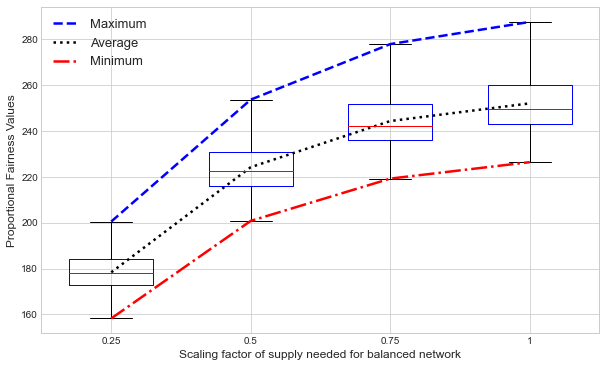

In [6]:
variable_name = 'proportional_fairness'

plt.figure(figsize=(10, 6))

min_values = []
max_values = []
mean_values = []

# Columns to exclude from boxplot computation
exclude_columns = ['mean', 'std', 'min', 'max', 'median', 'mode', 'q1', 'q2', 'q3']

# Iterate over the dictionary of DataFrames
for index, (key, df) in enumerate(data.items(), start=1):
    min_values.append(df[df['var_name'] == variable_name]['min'].iloc[0])
    mean_values.append(df[df['var_name'] == variable_name]['mean'].iloc[0])
    max_values.append(df[df['var_name'] == variable_name]['max'].iloc[0])
    
    filtered_df = df.drop(exclude_columns, axis=1)
    
    # Extract data for the 'proportional_fairness' variable
    variable_data = filtered_df[filtered_df['var_name'] == 'proportional_fairness'].drop('var_name', axis=1).T.squeeze()
    
    # Create a boxplot for the current DataFrame, aligning it based on the index
    plt.boxplot(variable_data, positions=[index], widths=0.6, whis=[0, 100], 
                boxprops=dict(color='blue', linewidth=1), 
                medianprops=dict(color='red', linewidth=1))

# Plot connected lines for min, max, and average
plt.plot(range(1, len(data) + 1), max_values, label='Maximum', linestyle='--', color='blue', linewidth=2.5)
plt.plot(range(1, len(data) + 1), mean_values, label='Average', linestyle=':', color='black', linewidth=2.5)
plt.plot(range(1, len(data) + 1), min_values, label='Minimum', linestyle='-.', color='red', linewidth=2.5)

# Set x-axis labels based on the keys of the dictionary
plt.xticks(range(1, len(data) + 1), data.keys())
plt.xlabel('Scaling factor supply needed for balanced network')
plt.legend(fontsize=13)

# Add title and labels
# plt.title('Boxplot for Proportional Fairness by Scarcity Level')
plt.ylabel('Proportional Fairness Values')

plt.grid(True)
plt.show()

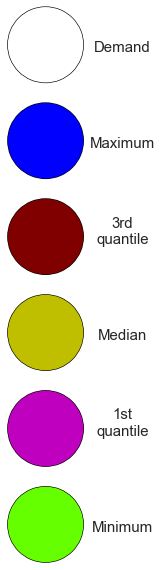

In [8]:
# Create the figure and axes for 6 subplots arranged in a 6x1 grid
fig, ax = plt.subplots(6, 1, figsize=(5, 10))

# Create the outer pie charts for the subplots
neon_green = [(0.4, 1.0, 0.0)]
x = ['Demand', 'Maximum', '3rd\nquantile', 'Median', '1st\nquantile', 'Minimum']
thy_colors = ['white', 'blue', ['#800000'], 'yellow', 'magenta', neon_green, 'red']

grey_background = '#CCCCCC'
for i in range(6):
    outer_pie = ax[i].pie([18], radius=1.5, colors=['k'])
    ax[i].pie([18], radius=1.475, colors=thy_colors[i])
    ax[i].set_aspect('equal')
    ax[i].set_facecolor(grey_background)
    ax[i].set_ylabel(x[i]+'\n', rotation = 0,fontsize=15)
    ax[i].yaxis.set_label_coords(1.7, 0.1)  # Adjust label position


# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Save the plot as PDF and PNG
fig.savefig('results_label.pdf', format='pdf', bbox_inches='tight')
fig.savefig('results_label.png', bbox_inches='tight')

# Show the plot
# plt.show()

# Gas

In [9]:
gas_allocation_data = {}

# Iterate over each scarcity level in the data dictionary
for scarcity_level, df in data.items():
    # Apply the function to 'var_name' column to create a new column 'network_name'
    df['network_name'] = df['var_name'].apply(extract_network_name)
    # Apply the function to 'var_name' column to create a new column 'node'
    df['node'] = df['var_name'].apply(extract_node_number)
    df['node'].fillna(-1, inplace=True)
    df['node'] = df['node'].astype(int)
    # Filter rows where the first three characters of 'var_name' are 'phi' and the network name is 'Gas'
    gas_subset = df[(df['var_name'].str[:3] == 'phi') & (df['network_name'] == 'Gas')]

    # Store the subset of data in water_allocation_data dictionary
    gas_allocation_data[scarcity_level] = gas_subset

gas_allocation_data[0.25]
# # Apply the function to 'var_name' column to create a new column 'network_name'
# df['network_name'] = df['var_name'].apply(extract_network_name)
# # Apply the function to 'var_name' column to create a new column 'node'
# df['node'] = df['var_name'].apply(extract_node_number)
# df['node'].fillna(-1, inplace=True)
# df['node'] = df['node'].astype(int)
# # Filter rows where the first three characters of 'var_name' are 'phi' and the network name is 'Gas'
# gas_subset = df[(df['var_name'].str[:5] == 'alpha') & (df['network_name'] == 'Gas')]
# # Store the subset of data in water_allocation_data dictionary
# gas_uncertain_coeff_data = gas_subset

,var_name,0,1,2,3,4,5,6,7,8,...,std,min,max,median,mode,q1,q2,q3,network_name,node
2,"phi_('Gas_node_3', 'Gas', 'Gas')",26.3,6.7,16.8,16.3,37.0,29.0,51.7,6.7,53.5,...,13.617620,6.7,53.6,29.10,6.7,16.100,29.10,37.125,Gas,3
4,"phi_('Gas_node_4', 'Gas', 'Gas')",40.7,22.5,21.1,34.4,42.4,32.9,15.3,1.6,17.8,...,14.952757,0.6,66.5,25.10,21.1,14.825,25.10,34.650,Gas,4
6,"phi_('Gas_node_5', 'Gas', 'Gas')",31.3,18.9,29.5,26.6,0.1,13.7,1.3,47.4,49.7,...,14.755144,0.1,57.0,21.35,12.1,12.075,21.35,35.500,Gas,5
8,"phi_('Gas_node_6', 'Gas', 'Gas')",17.7,17.7,17.7,4.9,17.7,14.4,17.7,12.7,10.8,...,4.669325,2.6,17.7,17.70,17.7,12.475,17.70,17.700,Gas,6
10,"phi_('Gas_node_7', 'Gas', 'Gas')",17.2,20.5,19.8,22.9,10.3,22.9,15.9,20.2,22.9,...,7.297933,0.2,22.9,22.90,22.9,13.400,22.90,22.900,Gas,7
12,"phi_('Gas_node_8', 'Gas', 'Gas')",37.1,19.1,31.6,29.3,7.5,5.4,20.6,45.9,45.0,...,15.353521,1.2,55.1,32.30,20.6,12.875,32.30,40.175,Gas,8
14,"phi_('Gas_node_9', 'Gas', 'Gas')",29.9,47.0,36.9,37.4,19.4,24.7,14.8,47.0,0.2,...,12.642400,0.1,47.0,28.15,47.0,19.850,28.15,38.250,Gas,9
16,"phi_('Gas_node_10', 'Gas', 'Gas')",13.4,13.4,7.4,13.4,13.4,10.3,13.4,0.3,13.4,...,3.120226,0.3,13.4,13.40,13.4,13.400,13.40,13.400,Gas,10
18,"phi_('Gas_node_11', 'Gas', 'Gas')",3.4,0.2,3.4,3.4,3.4,3.4,3.4,3.4,3.4,...,0.681296,0.2,3.4,3.40,3.4,3.400,3.40,3.400,Gas,11
20,"phi_('Gas_node_12', 'Gas', 'Gas')",14.2,14.2,4.1,1.3,14.2,14.2,14.2,14.2,14.2,...,3.854645,0.8,14.2,14.20,14.2,14.200,14.20,14.200,Gas,12


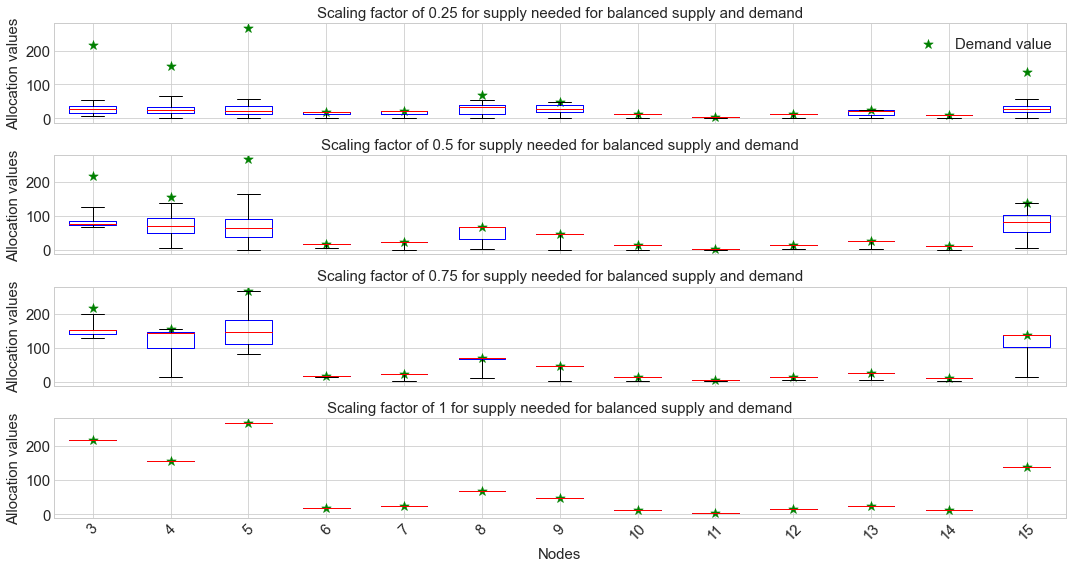

In [10]:
# Columns to exclude from boxplot computation
exclude_columns = ['mean', 'std', 'min', 'max', 'median', 'mode', 'q1', 'q2', 'q3', 'var_name', 'network_name', 'node']

# df = gas_uncertain_coeff_data.copy()

# plt.figure(figsize=(15, 3))

# # Get unique nodes for the current scarcity level
# nodes = sorted(df['node'].unique())  # Sort the unique node values
# # Update the list of all nodes
# all_nodes = []
# all_nodes.extend(nodes)
# # Prepare data for boxplot
# boxplot_data = []
# demand_data = []
# for node in nodes:
#     node_data = df[df['node'] == node].drop(exclude_columns, axis=1)
#     boxplot_data.append(node_data.values.flatten())
#     demand_data.append(demand['Gas'][node])

# # Create boxplot for the current scarcity level
# plt.boxplot(boxplot_data, widths=0.6, whis=[0, 100], 
#             boxprops=dict(color='blue', linewidth=1), 
#             medianprops=dict(color='red', linewidth=1))
# plt.title(f'Utility funciton uncertain coefficient variation')
# plt.ylabel('Value')
# # plt.tick_params(axis='x', rotation=45)
# plt.grid(True)

# # Set x ticks and labels only for the bottom subplot
# # plt.xlabel('Nodes')
# # plt.xticks(range(1, len(all_nodes) + 1))  # Start from 1
# plt.tight_layout()
# plt.show()

# Determine the number of scarcity levels
num_scarcity_levels = len(gas_allocation_data)

# Create subplots with transposed layout
fig, axes = plt.subplots(num_scarcity_levels, 1, figsize=(15, 8), sharex=True)

# Iterate over each scarcity level in the water_allocation_data dictionary
for i, (scarcity_level, df) in enumerate(gas_allocation_data.items()):
    
    # Get unique nodes for the current scarcity level
    nodes = sorted(df['node'].unique())  # Sort the unique node values
    # Update the list of all nodes
    all_nodes = []
    all_nodes.extend(nodes)
    # Prepare data for boxplot
    boxplot_data = []
    demand_data = []
    for node in nodes:
        node_data = df[df['node'] == node].drop(exclude_columns, axis=1)
        boxplot_data.append(node_data.values.flatten())
        demand_data.append(demand['Gas'][node])
    
    # Create boxplot for the current scarcity level
    axes[i].boxplot(boxplot_data, widths=0.6, whis=[0, 100], 
                boxprops=dict(color='blue', linewidth=1), 
                medianprops=dict(color='red', linewidth=1))
    if i == 0:
    # Plot the demand data as scatter points
        axes[i].scatter(range(1,len(nodes)+1), demand_data, s=100, color='g', marker='*', label = 'Demand value')  # Provide x-values (nodes)
    else:
        axes[i].scatter(range(1,len(nodes)+1), demand_data, s=100, color='g', marker='*')  # Provide x-values (nodes)
    axes[i].set_title(f'Scaling factor of {scarcity_level} for supply needed for balanced supply and demand', fontsize = 15)
    axes[i].set_ylabel('Allocation values', fontsize = 15)
    axes[i].tick_params(axis='y', labelsize=15)
    
#     axes[i].set_xticklabels(nodes)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Set x ticks and labels only for the bottom subplot
axes[-1].set_xlabel('Nodes', fontsize = 15)
axes[-1].set_xticks(range(1, len(all_nodes) + 1))  # Start from 1
axes[-1].set_xticklabels(all_nodes, fontsize = 15)
axes[0].legend(fontsize=15)
plt.tight_layout()
plt.show()


------------0.25------------


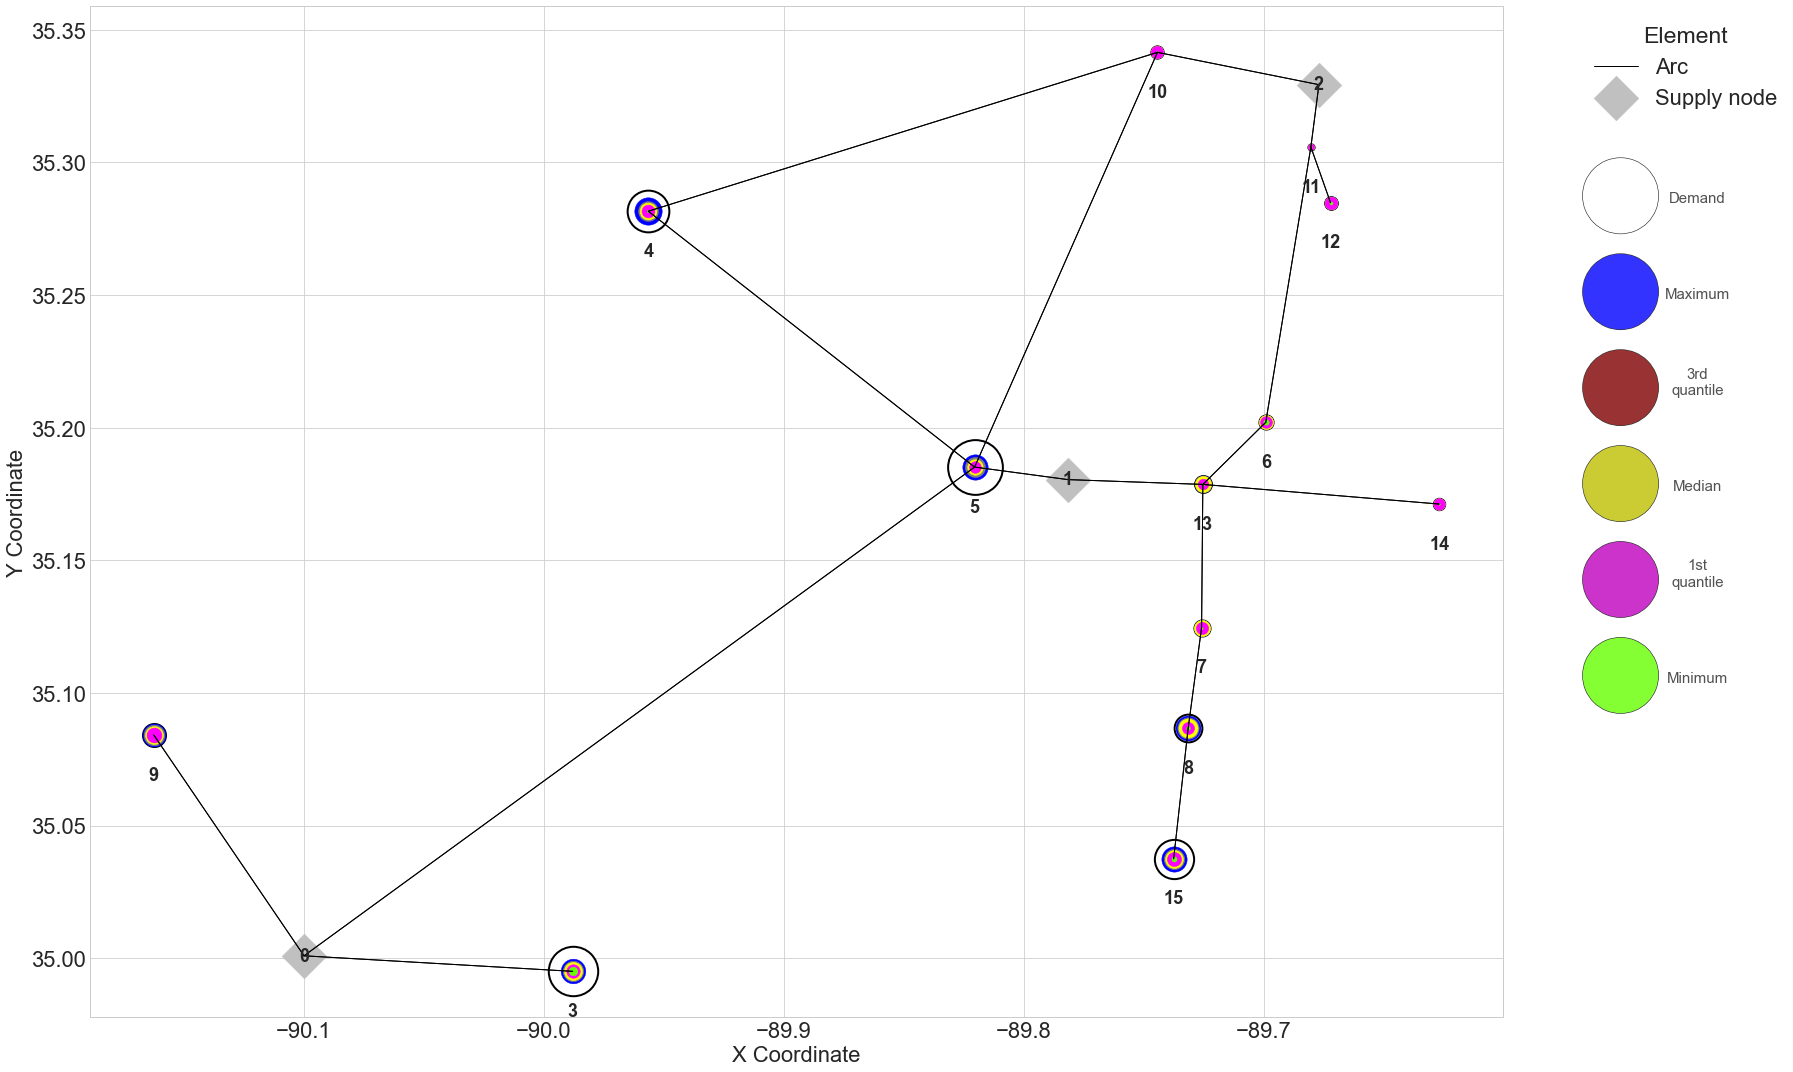


------------0.5------------


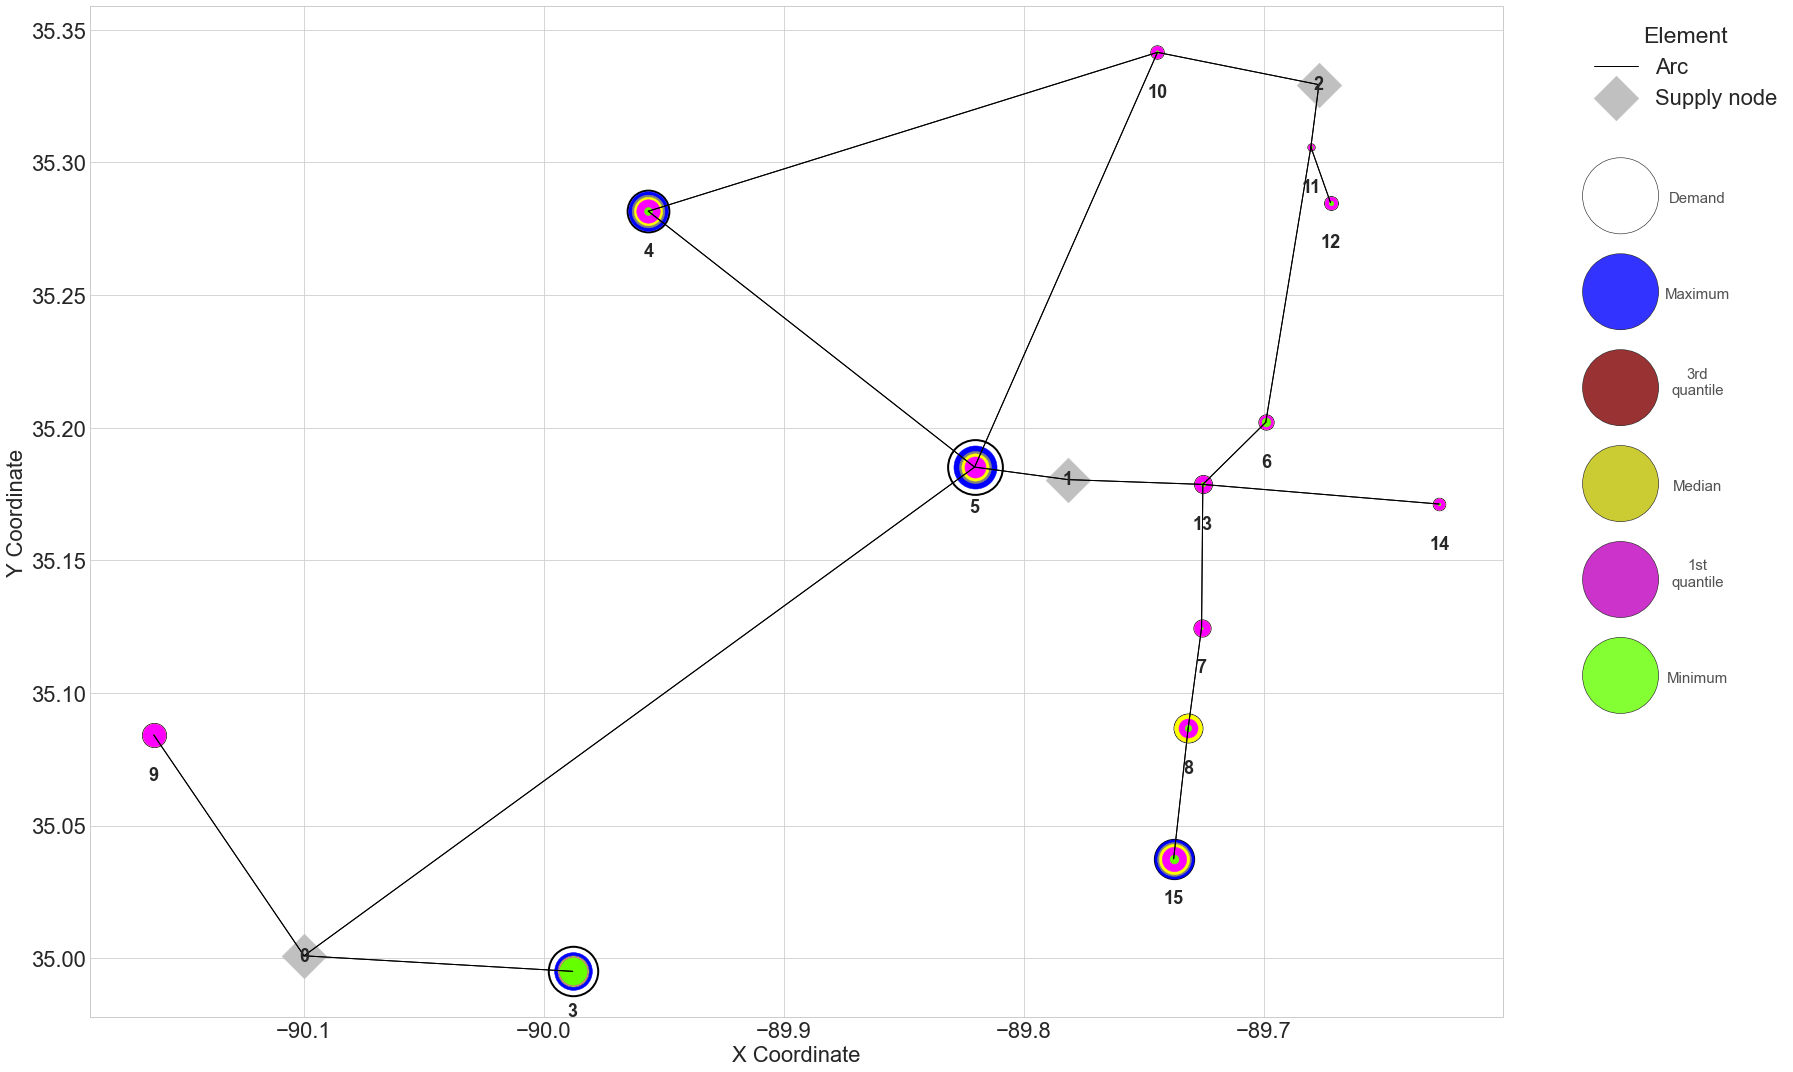


------------0.75------------


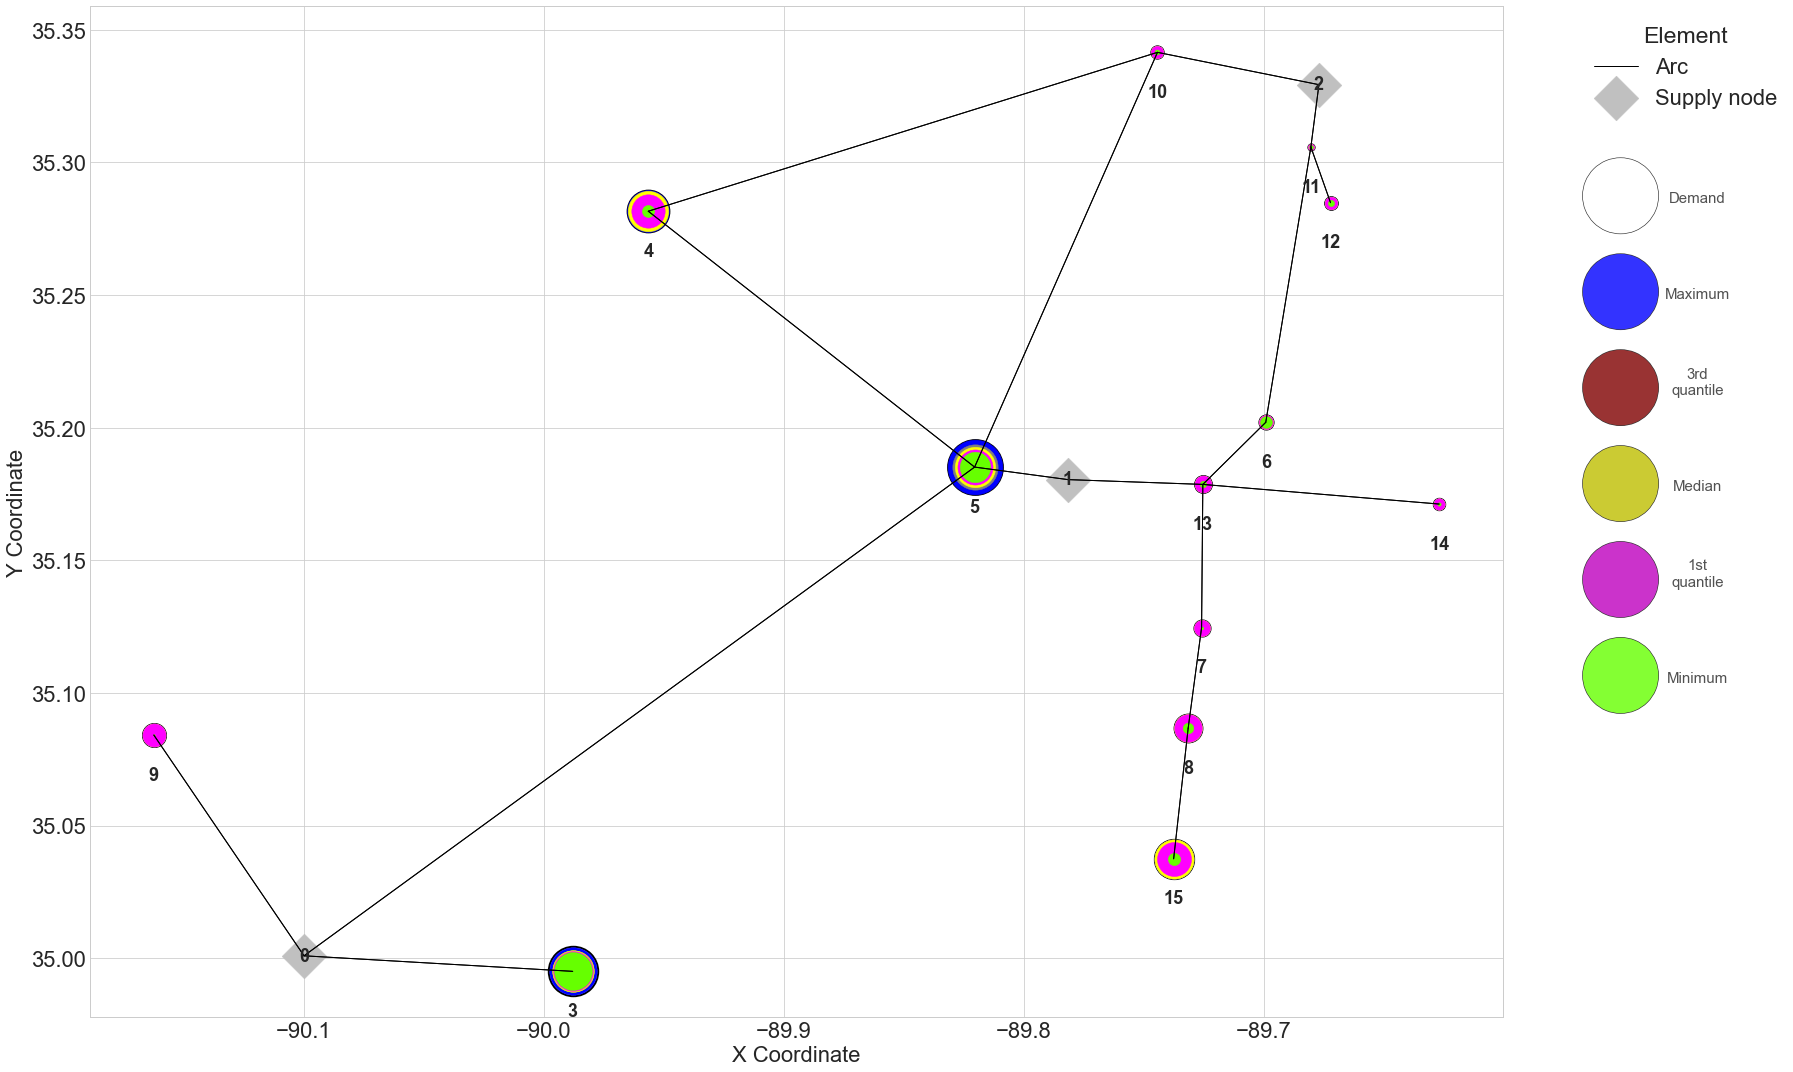


------------1------------


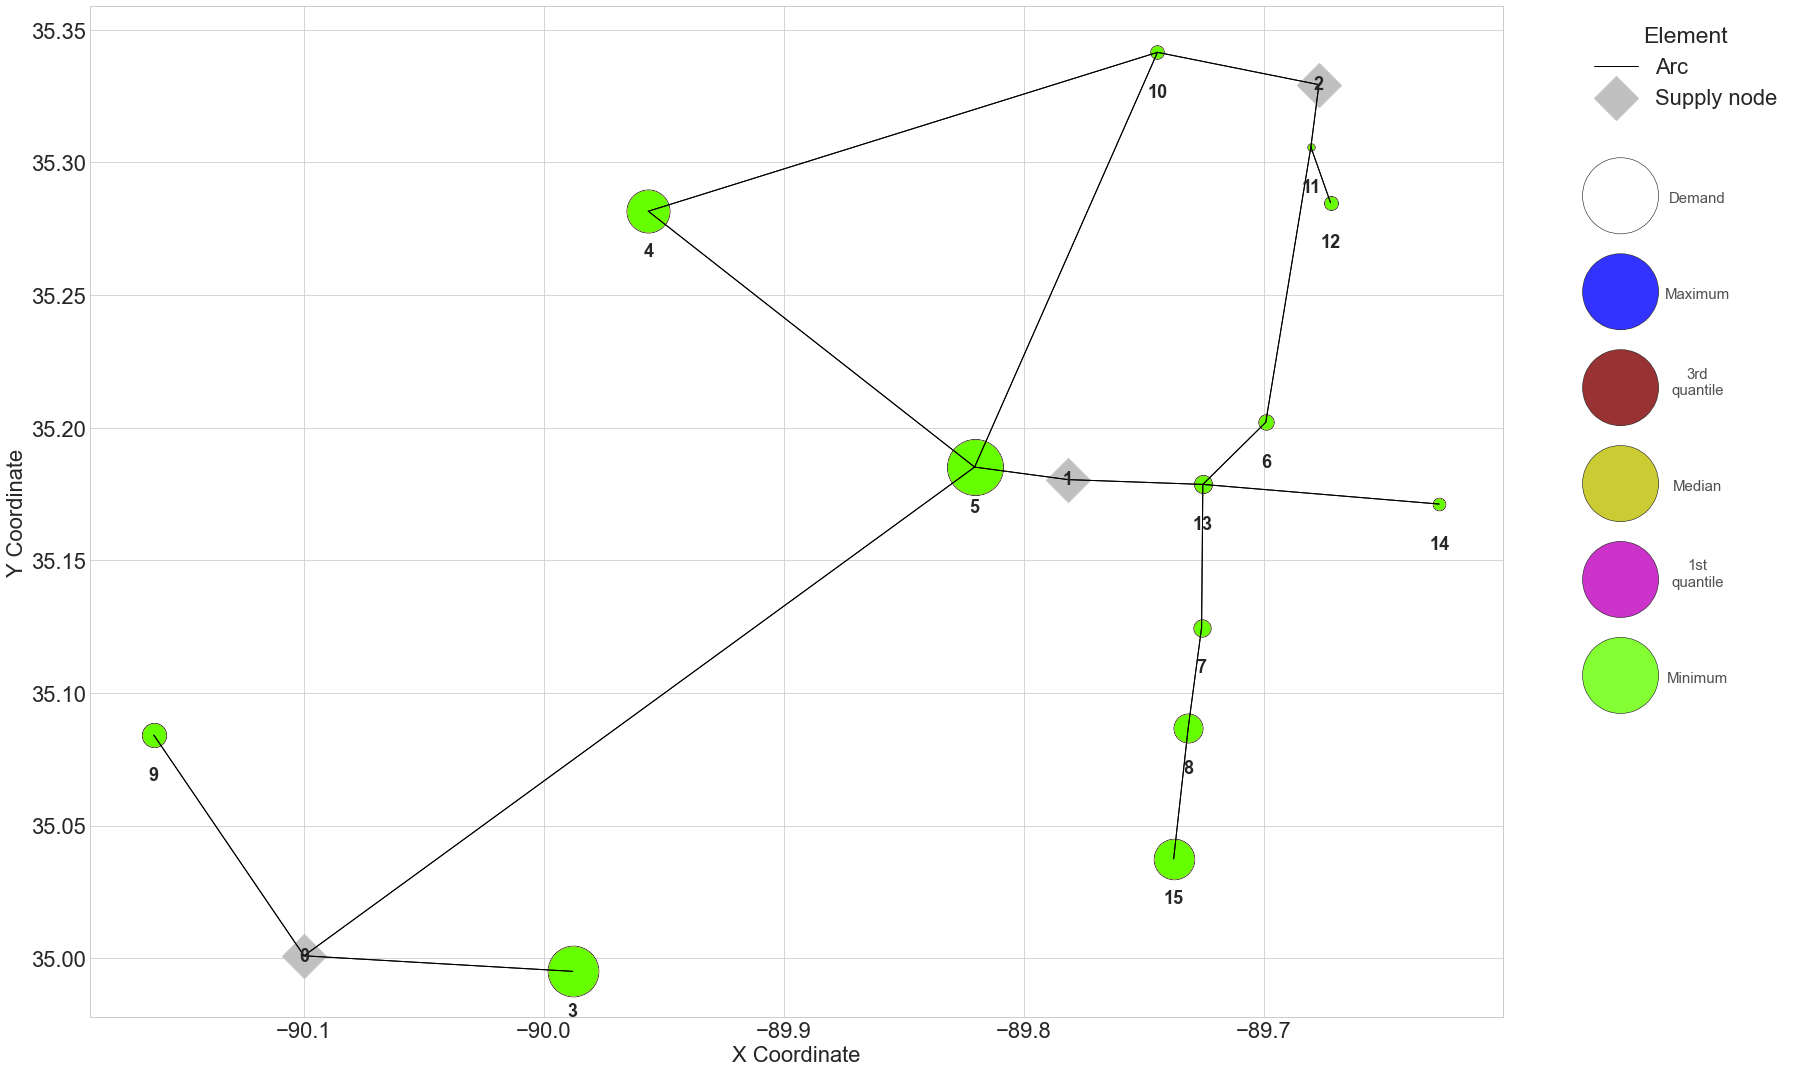

In [18]:
#GAS 

for scarcity_level in scarce:
    print(f'\n------------{scarcity_level}------------')
    fig, ax = plt.subplots(figsize=(25, 15))
    colors = {'Gas': 'silver', 'Power': '#B2FFB2', 'Water': '#A6D8FF'}
    labels = {'Gas': [], 'Power': [], 'Water': []}
    label_done = {'Gas': {'S':False,'T':False,'D':False}, 'Power': {'S':False,'T':False,'D':False}, 'Water': {'S':False,'T':False,'D':False}}
    thy_size = 1000
    node_type = 'Gas'
    max_demand_value = max_demand[node_type]
    base = 3000
    neon_green = [(0.4, 1.0, 0.0)]
    for number in list(gas_allocation_data[scarcity_level]['node'])+supply_nodes[node_type]+transshipment_nodes[node_type]:

        x = x_coord[node_type][number]
        y = y_coord[node_type][number]
        
        if number in supply_nodes[node_type]:

            if not label_done[node_type]['S']:
                plt.scatter(x, y, marker='D', s=thy_size, color=colors[node_type], label = 'Supply node')
                label_done[node_type]['S'] = True
            else:
                plt.scatter(x, y, marker='D', s=thy_size, color=colors[node_type])

            plt.text(x, y, number, fontsize=18, ha='center', va='center',  weight='bold')

        elif number in transshipment_nodes[node_type]:
            if not label_done[node_type]['T']:
                plt.scatter(x, y, marker='s', s=thy_size, color=colors[node_type], label = 'Transshipment node')
                label_done[node_type]['T'] = True
            else:
                plt.scatter(x, y, marker='s', s=thy_size, color=colors[node_type])

            plt.text(x, y, number, fontsize=18, ha='center', va='center',  weight='bold')

        else:
        
            node_demand = demand[node_type][number]
            max_val = gas_allocation_data[scarcity_level][gas_allocation_data[scarcity_level]['node'] == number]['max']
            Q3 = gas_allocation_data[scarcity_level][gas_allocation_data[scarcity_level]['node'] == number]['q3']
            median = gas_allocation_data[scarcity_level][gas_allocation_data[scarcity_level]['node'] == number]['median']
            Q1 = gas_allocation_data[scarcity_level][gas_allocation_data[scarcity_level]['node'] == number]['q1']
            min_val = gas_allocation_data[scarcity_level][gas_allocation_data[scarcity_level]['node'] == number]['min']
        
#             if not label_done[node_type]['D']:
#                 plt.scatter(x, y, marker='o', edgecolor='k', s= thy_size, facecolor='white', linewidth = 2, label = 'Demand node')
#                 label_done[node_type]['D'] = True
#             else:    

            plt.scatter(x, y, marker='o', edgecolor='k', s= node_demand/max_demand_value*base, facecolor='white', linewidth = 2)
            plt.scatter(x, y, marker='o', s= max_val/max_demand_value*base , color='blue')
            plt.scatter(x, y, marker='o', s= Q3/max_demand_value*base, color='grey')
            plt.scatter(x, y, marker='o', s= median/max_demand_value*base, color='yellow')
            plt.scatter(x, y, marker='o', s= Q1/max_demand_value*base, color='magenta')
            plt.scatter(x, y, marker='o', s= min_val/max_demand_value*base, color=neon_green)
            
            plt.text(x, y-0.015, number, fontsize=18, ha='center', va='center',  weight='bold')


    # Plot lines connecting nodes from list A (in black)
    arc_label = False
    for arc in A_k[node_type]:

        start_node, end_node = arc
        start_x, start_y = x_coord[node_type][start_node], y_coord[node_type][start_node]
        end_x, end_y = x_coord[node_type][end_node], y_coord[node_type][end_node]

        if not arc_label:
            plt.plot([start_x, end_x], [start_y, end_y], linestyle = 'solid', color='black', linewidth = 1, label = 'Arc')
            arc_label = True
        else:
            plt.plot([start_x, end_x], [start_y, end_y], linestyle = 'solid', color='black', linewidth = 1)

    # Show the plot with legend
    legend = plt.legend(title='Element', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 22}, fontsize = 22)
    legend.get_title().set_fontsize(23)

    plt.tick_params(axis='x', labelsize=22)
    plt.xlabel('X Coordinate', fontsize = 22)
    plt.ylabel('Y Coordinate', fontsize = 22)
    plt.tick_params(axis='y', labelsize=22)
    #         plt.title(f"t = {t}, KKT solution", fontsize = 25)

    # Show the plot
    plt.grid(True)
    
    # Add the saved image to the center bottom of the figure
    img = plt.imread('results_label.png')
    # Calculate the position and size of the added image
    img_height = fig.bbox.height * 0.2  # Adjust the size as needed
    img_width = img_height * img.shape[1] / img.shape[0]
    img_x = fig.bbox.width - img_width/0.273
    img_y = (fig.bbox.y0 + fig.bbox.height)/2 *0.65  # Adjust the vertical position as needed
    
    # Add the image with adjusted position and size
    fig.figimage(img, xo=img_x, yo=img_y, origin='upper', alpha=0.8)  # Adjust alpha as needed

    
    # Adjust the layout to ensure everything fits properly
    plt.tight_layout()
    
#     fig.savefig(f'{node_type}_network_scarcity_level_{scarcity_level}_dispersion_on_map.pdf', format='pdf', bbox_inches = 'tight')
#     fig.savefig(f'{node_type}_network_scarcity_level_{scarcity_level}_dispersion_on_map.png', bbox_inches = 'tight')
    plt.show()
    

# Power

In [12]:
power_allocation_data = {}

# Iterate over each scarcity level in the data dictionary
for scarcity_level, df in data.items():
    # Apply the function to 'var_name' column to create a new column 'network_name'
    df['network_name'] = df['var_name'].apply(extract_network_name)
    # Apply the function to 'var_name' column to create a new column 'node'
    df['node'] = df['var_name'].apply(extract_node_number)
    df['node'].fillna(-1, inplace=True)
    df['node'] = df['node'].astype(int)
    # Filter rows where the first three characters of 'var_name' are 'phi' and the network name is 'Power'
    power_subset = df[(df['var_name'].str[:3] == 'phi') & (df['network_name'] == 'Power')]

    # Store the subset of data in water_allocation_data dictionary
    power_allocation_data[scarcity_level] = power_subset

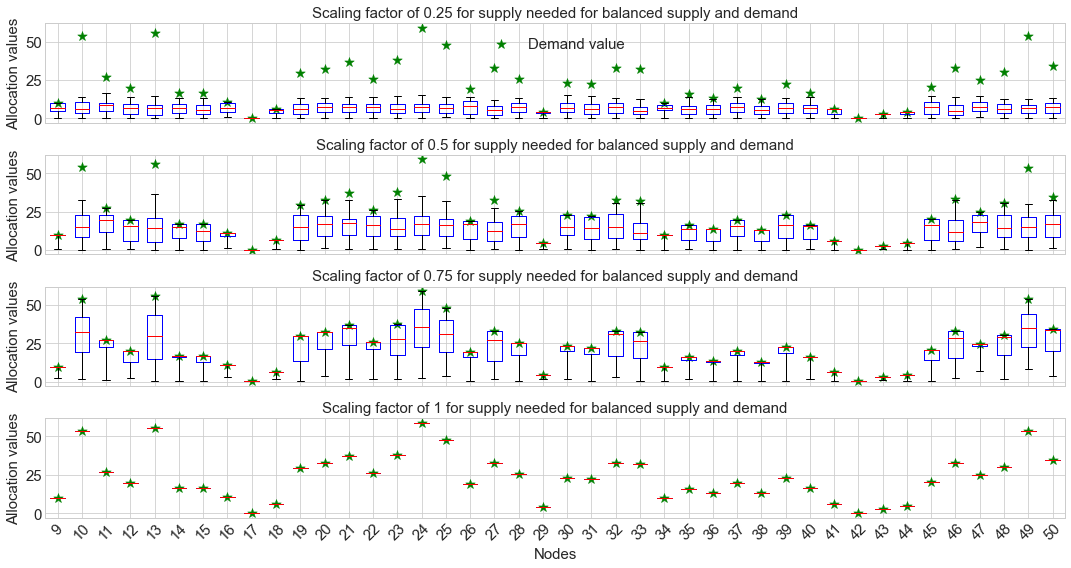

In [13]:
# Determine the number of scarcity levels
num_scarcity_levels = len(power_allocation_data)

# Create subplots with transposed layout
fig, axes = plt.subplots(num_scarcity_levels, 1, figsize=(15, 8), sharex=True)


# Iterate over each scarcity level in the water_allocation_data dictionary
for i, (scarcity_level, df) in enumerate(power_allocation_data.items()):
    
    # Get unique nodes for the current scarcity level
    nodes = sorted(df['node'].unique())  # Sort the unique node values
    # Update the list of all nodes
    all_nodes = []
    all_nodes.extend(nodes)
    # Prepare data for boxplot
    boxplot_data = []
    demand_data = []
    for node in nodes:
        node_data = df[df['node'] == node].drop(exclude_columns, axis=1)
        boxplot_data.append(node_data.values.flatten())
        demand_data.append(demand['Power'][node])
    
    # Create boxplot for the current scarcity level
    axes[i].boxplot(boxplot_data, widths=0.6, whis=[0, 100], 
                boxprops=dict(color='blue', linewidth=1), 
                medianprops=dict(color='red', linewidth=1))
    if i == 0:
        # Plot the demand data as scatter points
            axes[i].scatter(range(1,len(nodes)+1), demand_data, s=100, color='g', marker='*', label = 'Demand value')  # Provide x-values (nodes)
    else:
        axes[i].scatter(range(1,len(nodes)+1), demand_data, s=100, color='g', marker='*')  # Provide x-values (nodes)
    axes[i].set_title(f'Scaling factor of {scarcity_level} for supply needed for balanced supply and demand', fontsize = 15)
    axes[i].set_ylabel('Allocation values', fontsize = 15)
    axes[i].tick_params(axis='y', labelsize=15)

#     axes[i].set_xticklabels(nodes)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Set x ticks and labels only for the bottom subplot
axes[-1].set_xlabel('Nodes', fontsize = 15)
axes[-1].set_xticks(range(1, len(all_nodes) + 1))  # Start from 1
axes[-1].set_xticklabels(all_nodes, fontsize = 15)
axes[0].legend(fontsize=15)
plt.tight_layout()
plt.show()


------------0.25------------


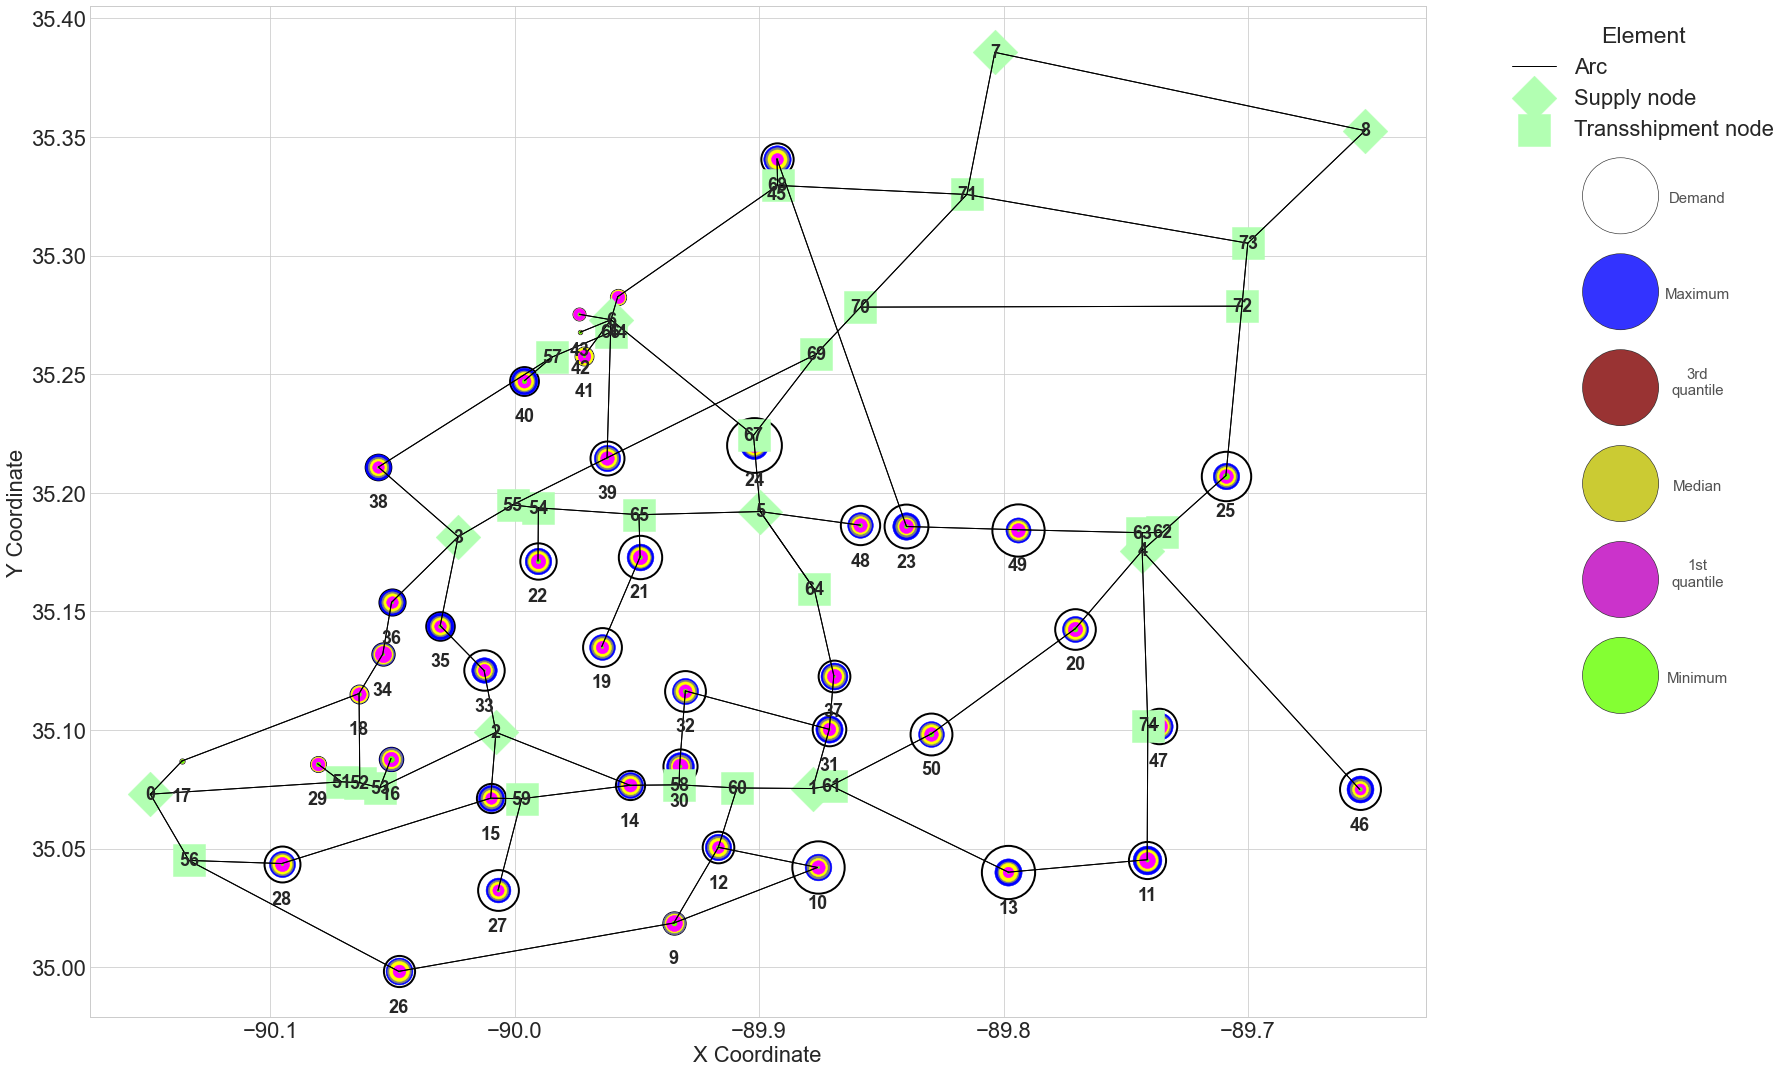


------------0.5------------


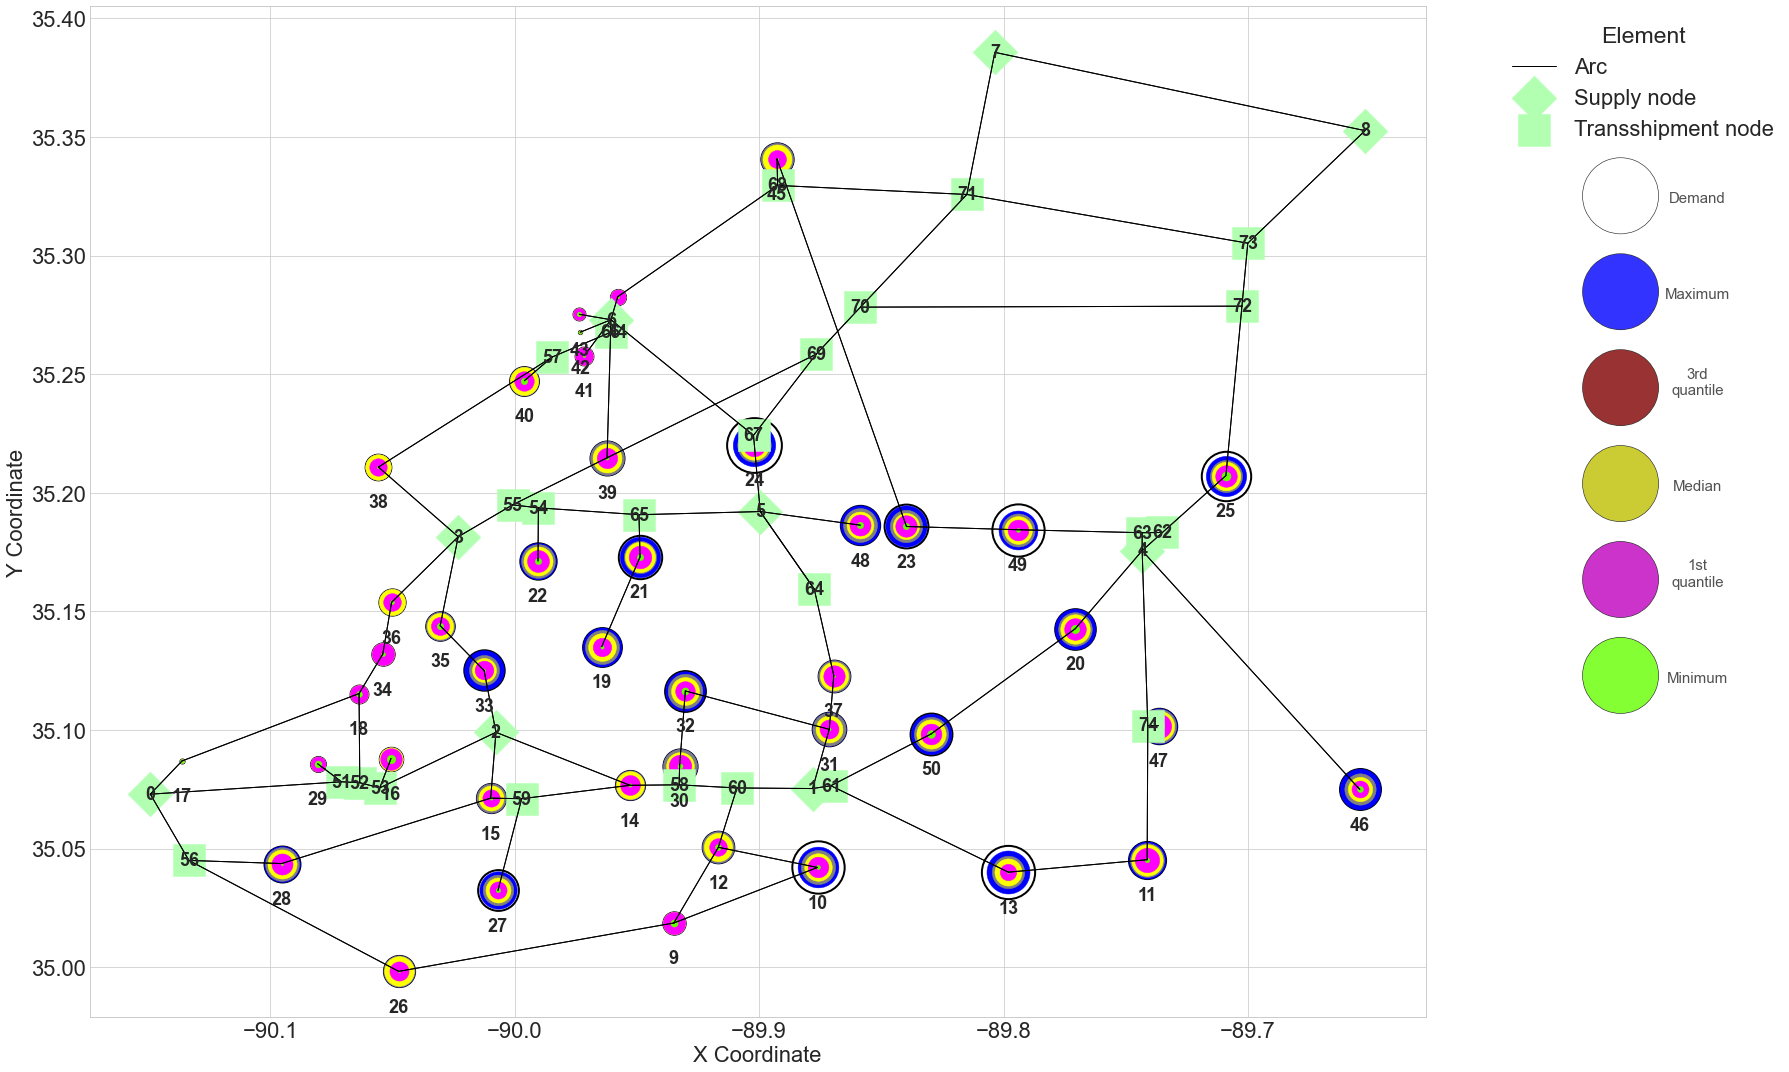


------------0.75------------


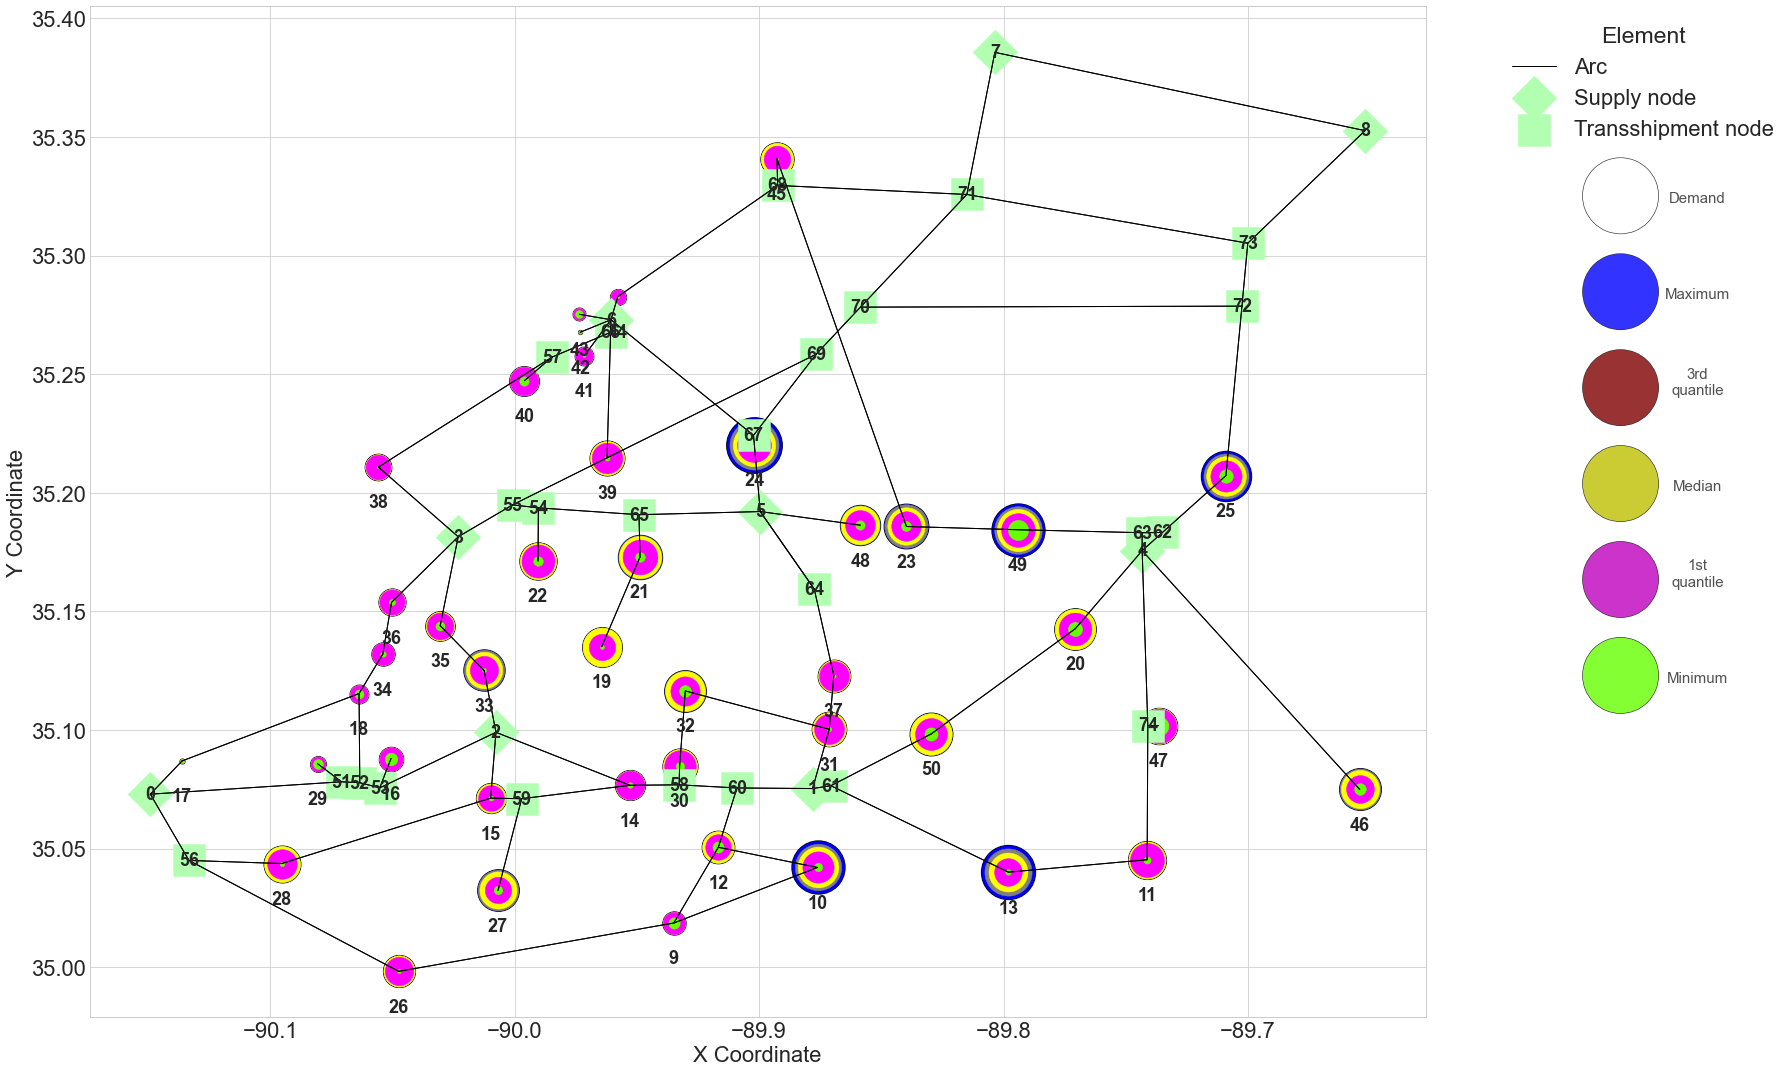


------------1------------


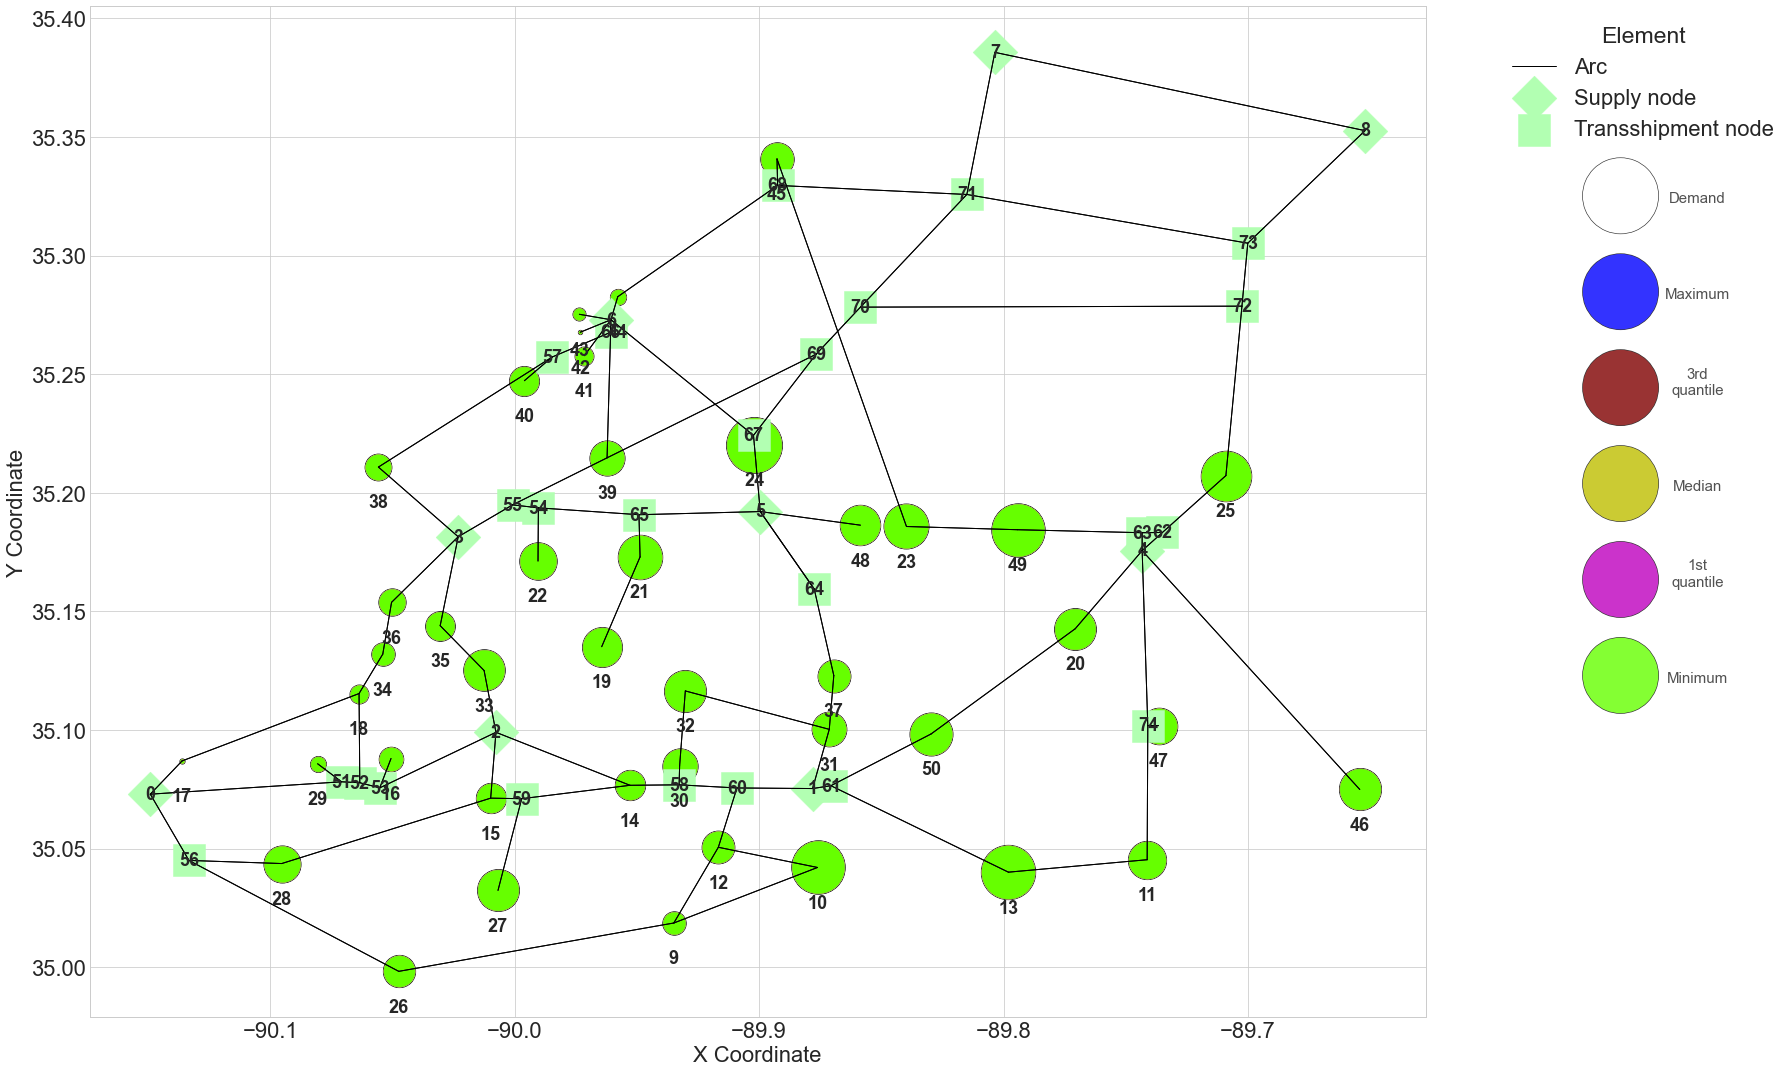

In [14]:
#POWER

for scarcity_level in scarce:
    print(f'\n------------{scarcity_level}------------')
    fig, ax = plt.subplots(figsize=(25, 15))
    colors = {'Gas': 'silver', 'Power': '#B2FFB2', 'Water': '#A6D8FF'}
    labels = {'Gas': [], 'Power': [], 'Water': []}
    label_done = {'Gas': {'S':False,'T':False,'D':False}, 'Power': {'S':False,'T':False,'D':False}, 'Water': {'S':False,'T':False,'D':False}}
    thy_size = 1000
    node_type = 'Power'
    max_demand_value = max_demand[node_type]
    base = 3000
    neon_green = [(0.4, 1.0, 0.0)]
    for number in list(power_allocation_data[scarcity_level]['node'])+supply_nodes[node_type]+transshipment_nodes[node_type]:

        x = x_coord[node_type][number]
        y = y_coord[node_type][number]
        
        if number in supply_nodes[node_type]:

            if not label_done[node_type]['S']:
                plt.scatter(x, y, marker='D', s=thy_size, color=colors[node_type], label = 'Supply node')
                label_done[node_type]['S'] = True
            else:
                plt.scatter(x, y, marker='D', s=thy_size, color=colors[node_type])

            plt.text(x, y, number, fontsize=18, ha='center', va='center',  weight='bold')

        elif number in transshipment_nodes[node_type]:
            if not label_done[node_type]['T']:
                plt.scatter(x, y, marker='s', s=thy_size, color=colors[node_type], label = 'Transshipment node')
                label_done[node_type]['T'] = True
            else:
                plt.scatter(x, y, marker='s', s=thy_size, color=colors[node_type])

            plt.text(x, y, number, fontsize=18, ha='center', va='center',  weight='bold')

        else:
        
            node_demand = demand[node_type][number]
            max_val = power_allocation_data[scarcity_level][power_allocation_data[scarcity_level]['node'] == number]['max']
            Q3 = power_allocation_data[scarcity_level][power_allocation_data[scarcity_level]['node'] == number]['q3']
            median = power_allocation_data[scarcity_level][power_allocation_data[scarcity_level]['node'] == number]['median']
            Q1 = power_allocation_data[scarcity_level][power_allocation_data[scarcity_level]['node'] == number]['q1']
            min_val = power_allocation_data[scarcity_level][power_allocation_data[scarcity_level]['node'] == number]['min']
        
#             if not label_done[node_type]['D']:
#                 plt.scatter(x, y, marker='o', edgecolor='k', s= thy_size, facecolor='white', linewidth = 2, label = 'Demand node')
#                 label_done[node_type]['D'] = True
#             else:    

            plt.scatter(x, y, marker='o', edgecolor='k', s= node_demand/max_demand_value*base, facecolor='white', linewidth = 2)
            plt.scatter(x, y, marker='o', s= max_val/max_demand_value*base , color='blue')
            plt.scatter(x, y, marker='o', s= Q3/max_demand_value*base, color='grey')
            plt.scatter(x, y, marker='o', s= median/max_demand_value*base, color='yellow')
            plt.scatter(x, y, marker='o', s= Q1/max_demand_value*base, color='magenta')
            plt.scatter(x, y, marker='o', s= min_val/max_demand_value*base, color=neon_green)
            
            plt.text(x, y-0.015, number, fontsize=18, ha='center', va='center',  weight='bold')


    # Plot lines connecting nodes from list A (in black)
    arc_label = False
    for arc in A_k[node_type]:

        start_node, end_node = arc
        start_x, start_y = x_coord[node_type][start_node], y_coord[node_type][start_node]
        end_x, end_y = x_coord[node_type][end_node], y_coord[node_type][end_node]

        if not arc_label:
            plt.plot([start_x, end_x], [start_y, end_y], linestyle = 'solid', color='black', linewidth = 1, label = 'Arc')
            arc_label = True
        else:
            plt.plot([start_x, end_x], [start_y, end_y], linestyle = 'solid', color='black', linewidth = 1)

    # Show the plot with legend
    legend = plt.legend(title='Element', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 22}, fontsize = 22)
    legend.get_title().set_fontsize(23)

    plt.tick_params(axis='x', labelsize=22)
    plt.xlabel('X Coordinate', fontsize = 22)
    plt.ylabel('Y Coordinate', fontsize = 22)
    plt.tick_params(axis='y', labelsize=22)
    #         plt.title(f"t = {t}, KKT solution", fontsize = 25)

    # Show the plot
    plt.grid(True)
    
    # Add the saved image to the center bottom of the figure
    img = plt.imread('results_label.png')
    # Calculate the position and size of the added image
    img_height = fig.bbox.height * 0.2  # Adjust the size as needed
    img_width = img_height * img.shape[1] / img.shape[0]
    img_x = fig.bbox.width - img_width/0.273
    img_y = (fig.bbox.y0 + fig.bbox.height)/2 *0.65  # Adjust the vertical position as needed
    
    # Add the image with adjusted position and size
    fig.figimage(img, xo=img_x, yo=img_y, origin='upper', alpha=0.8)  # Adjust alpha as needed

    
    # Adjust the layout to ensure everything fits properly
    plt.tight_layout()
    
#     fig.savefig(f'{node_type}_network_scarcity_level_{scarcity_level}_dispersion_on_map.pdf', format='pdf', bbox_inches = 'tight')
#     fig.savefig(f'{node_type}_network_scarcity_level_{scarcity_level}_dispersion_on_map.png', bbox_inches = 'tight')
    plt.show()
    

# Water

In [15]:
water_allocation_data = {}

# Iterate over each scarcity level in the data dictionary
for scarcity_level, df in data.items():
    # Apply the function to 'var_name' column to create a new column 'network_name'
    df['network_name'] = df['var_name'].apply(extract_network_name)
    # Apply the function to 'var_name' column to create a new column 'node'
    df['node'] = df['var_name'].apply(extract_node_number)
    df['node'].fillna(-1, inplace=True)
    df['node'] = df['node'].astype(int)
    # Filter rows where the first three characters of 'var_name' are 'phi' and the network name is 'Water'
    water_subset = df[(df['var_name'].str[:3] == 'phi') & (df['network_name'] == 'Water')]

    # Store the subset of data in water_allocation_data dictionary
    water_allocation_data[scarcity_level] = water_subset

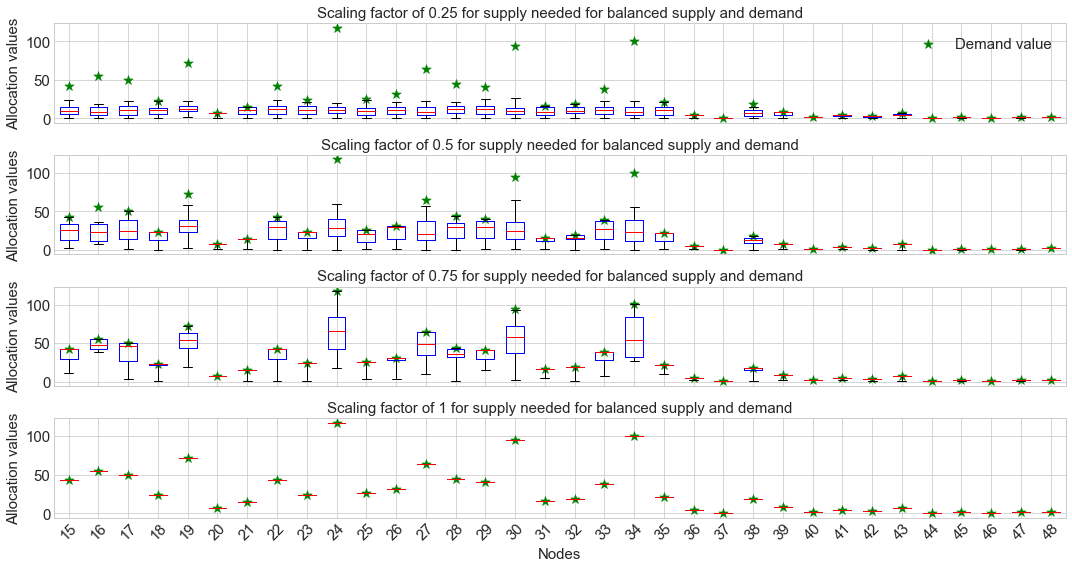

In [16]:
# Determine the number of scarcity levels
num_scarcity_levels = len(water_allocation_data)

# Create subplots with transposed layout
fig, axes = plt.subplots(num_scarcity_levels, 1, figsize=(15, 8), sharex=True)

# Iterate over each scarcity level in the water_allocation_data dictionary
for i, (scarcity_level, df) in enumerate(water_allocation_data.items()):
    
    # Get unique nodes for the current scarcity level
    nodes = sorted(df['node'].unique())  # Sort the unique node values
    # Update the list of all nodes
    all_nodes = []
    all_nodes.extend(nodes)
    # Prepare data for boxplot
    boxplot_data = []
    demand_data = []
    for node in nodes:
        node_data = df[df['node'] == node].drop(exclude_columns, axis=1)
        boxplot_data.append(node_data.values.flatten())
        demand_data.append(demand['Water'][node])
    
    # Create boxplot for the current scarcity level
    axes[i].boxplot(boxplot_data, widths=0.6, whis=[0, 100], 
                boxprops=dict(color='blue', linewidth=1), 
                medianprops=dict(color='red', linewidth=1))
    if i == 0:
        # Plot the demand data as scatter points
            axes[i].scatter(range(1,len(nodes)+1), demand_data, s=100, color='g', marker='*', label = 'Demand value')  # Provide x-values (nodes)
    else:
        axes[i].scatter(range(1,len(nodes)+1), demand_data, s=100, color='g', marker='*')  # Provide x-values (nodes)
    axes[i].set_title(f'Scaling factor of {scarcity_level} for supply needed for balanced supply and demand', fontsize = 15)
    axes[i].set_ylabel('Allocation values', fontsize = 15)
    axes[i].tick_params(axis='y', labelsize=15)

#     axes[i].set_xticklabels(nodes)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Set x ticks and labels only for the bottom subplot
axes[-1].set_xlabel('Nodes', fontsize = 15)
axes[-1].set_xticks(range(1, len(all_nodes) + 1))  # Start from 1
axes[-1].set_xticklabels(all_nodes, fontsize = 15)
axes[0].legend(fontsize=15)
plt.tight_layout()
plt.show()


------------0.25------------


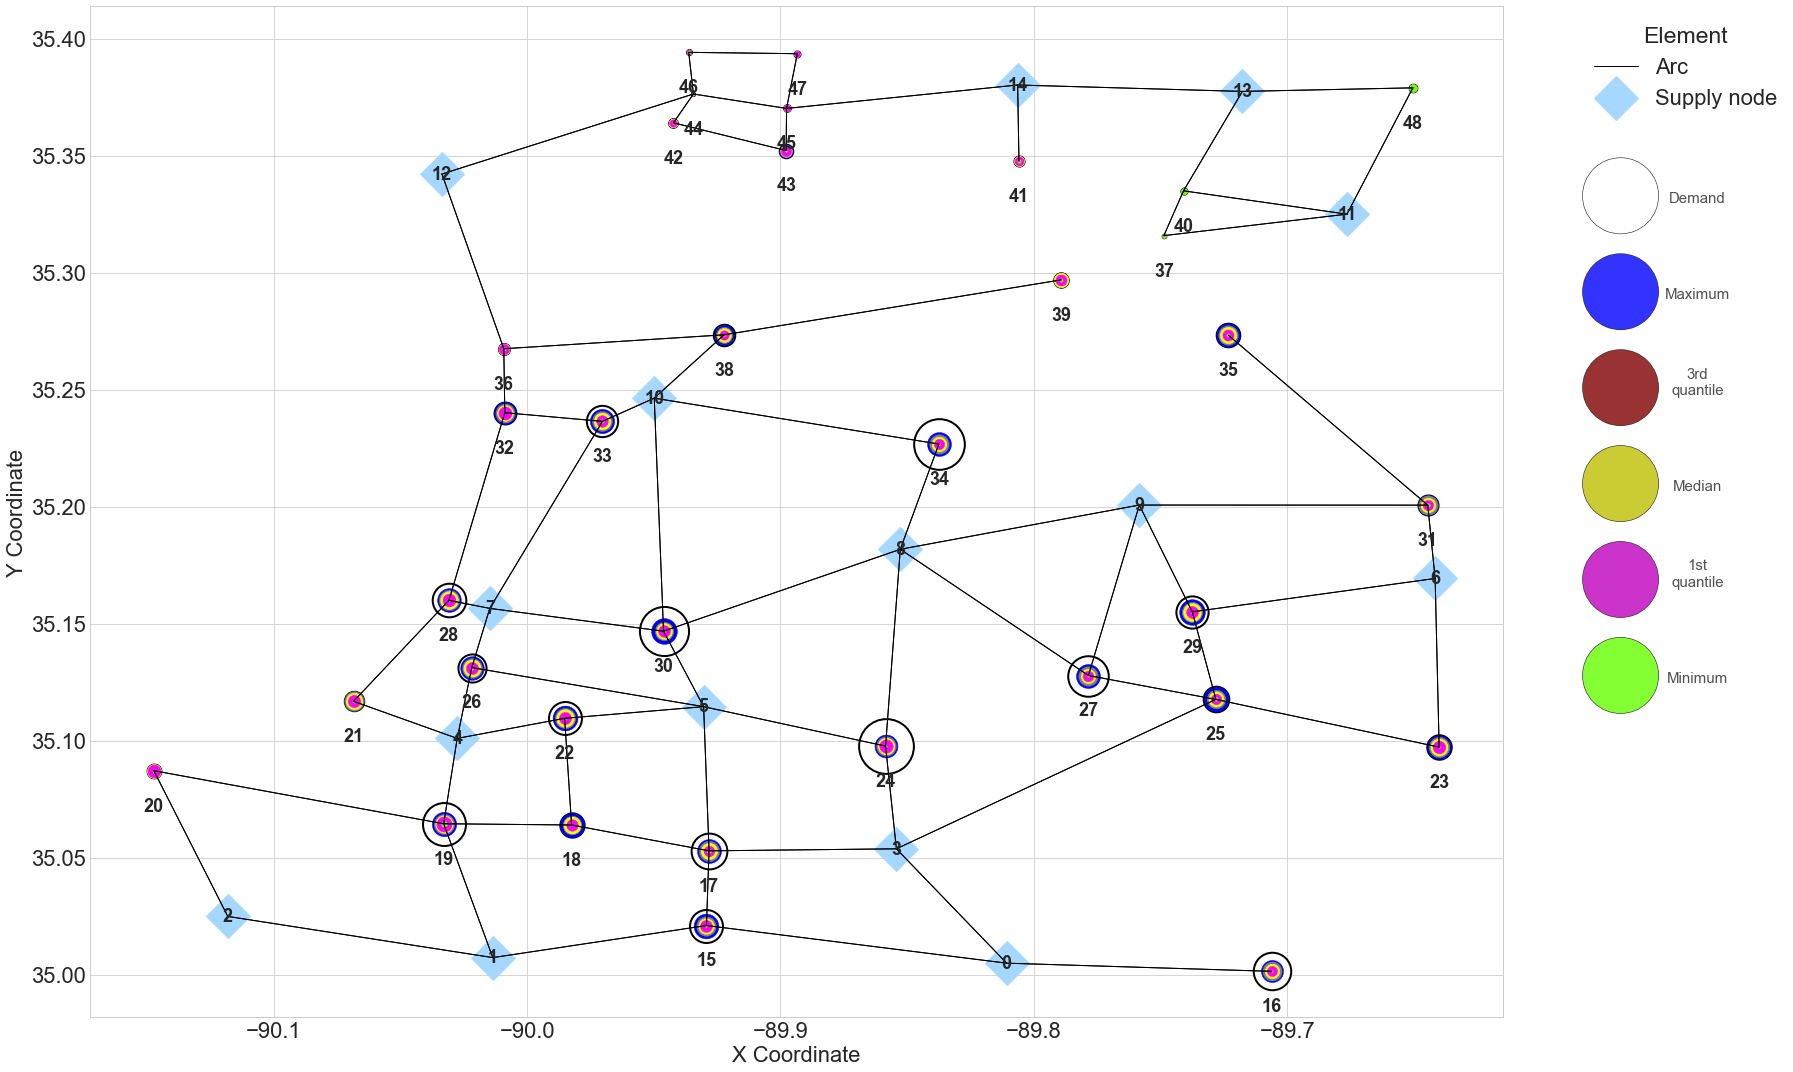


------------0.5------------


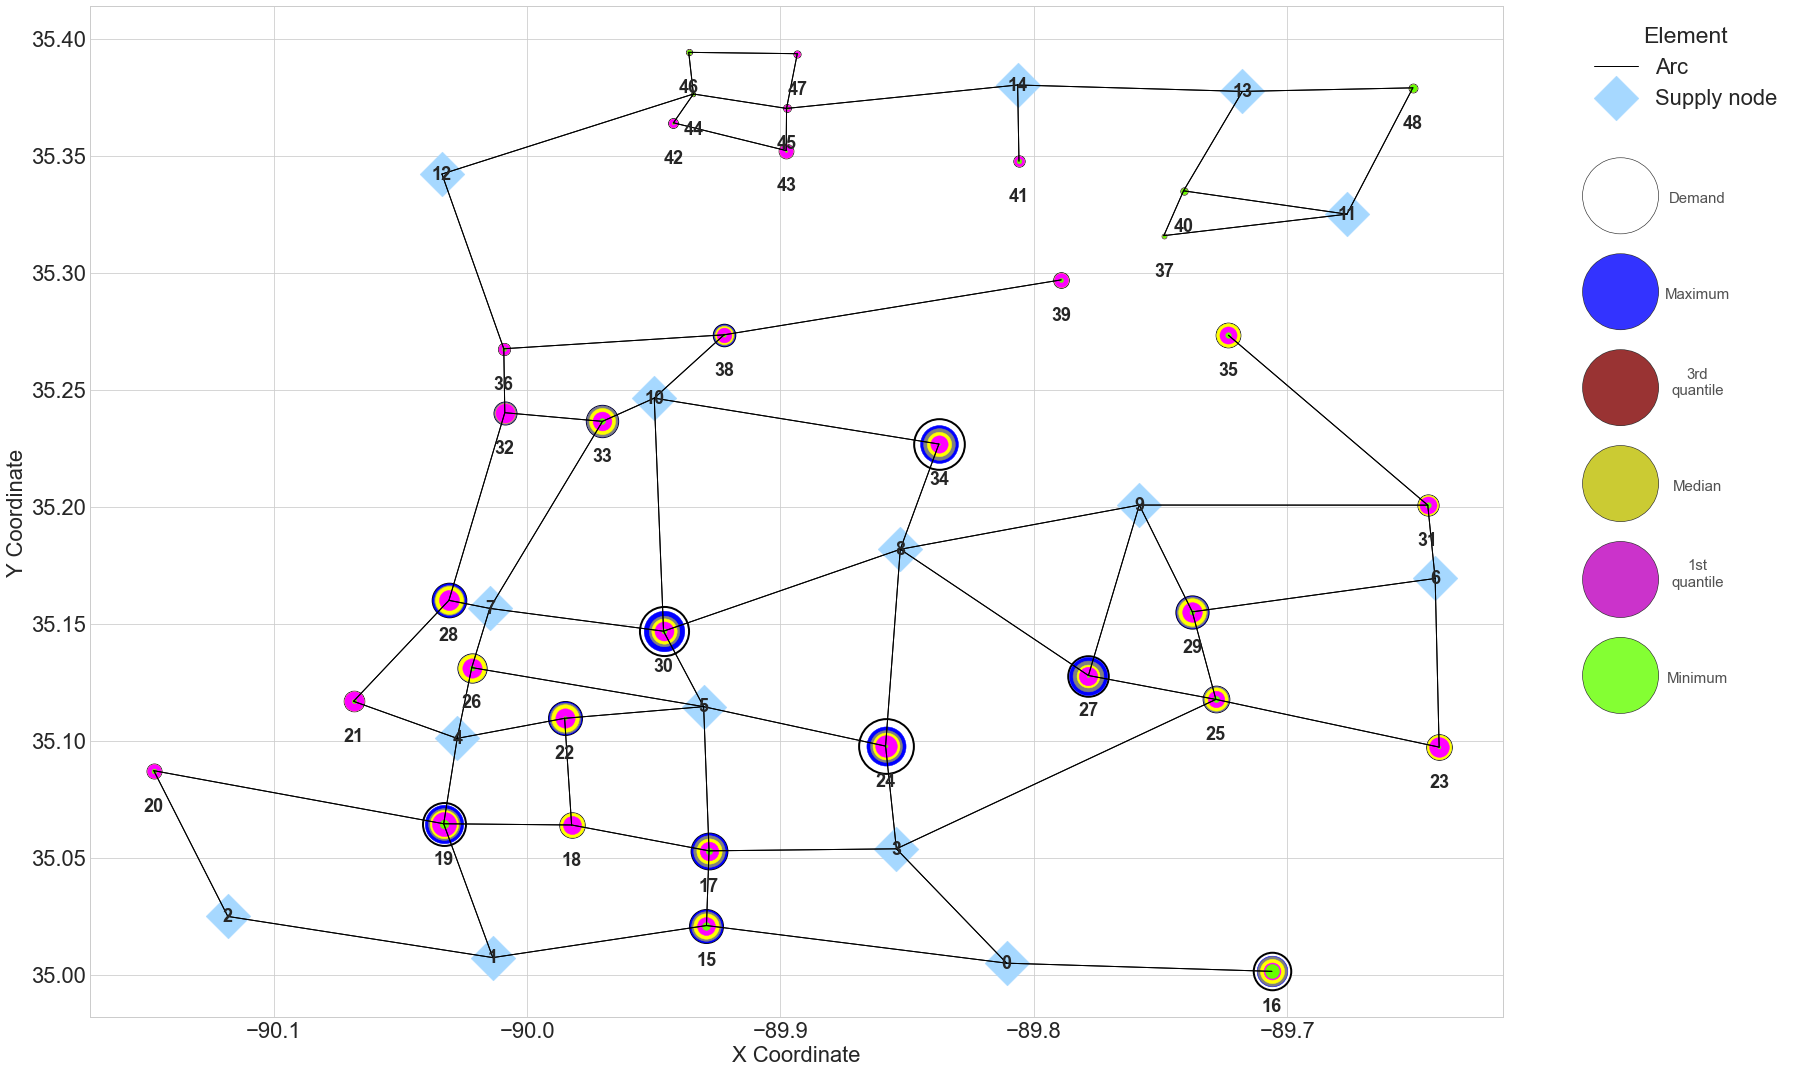


------------0.75------------


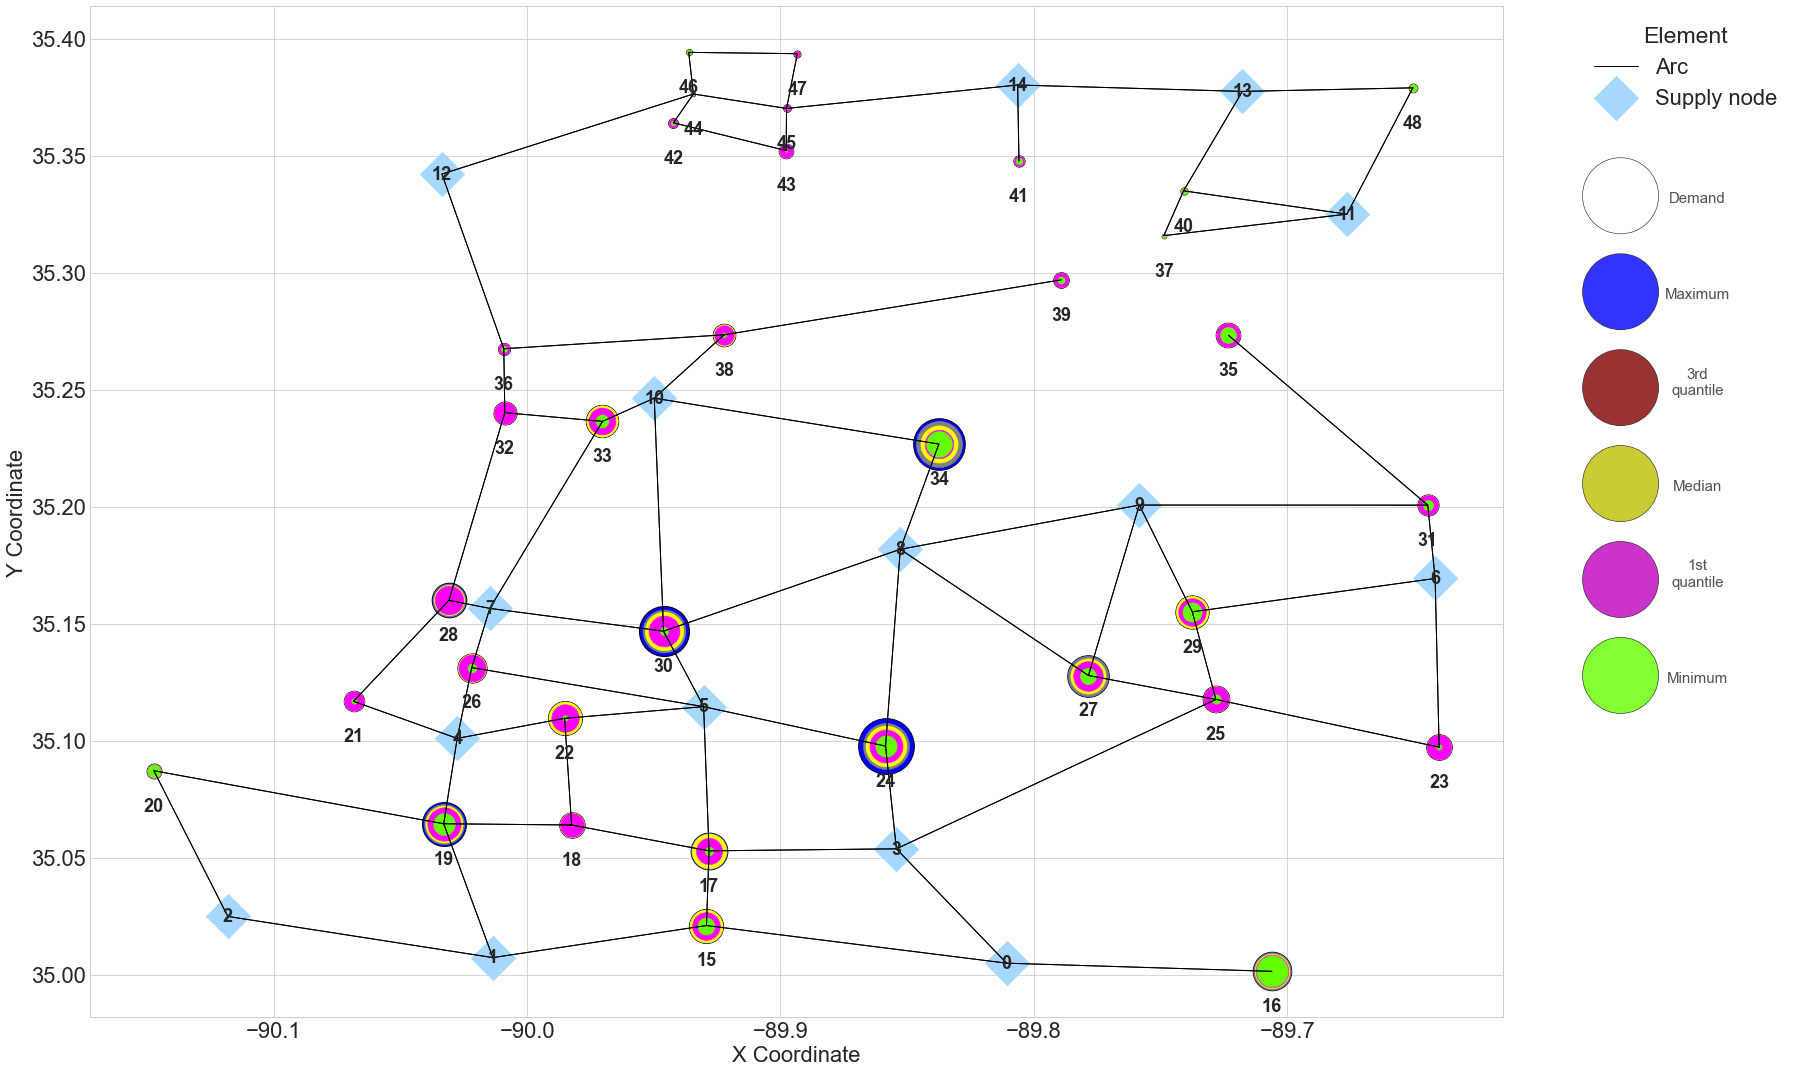


------------1------------


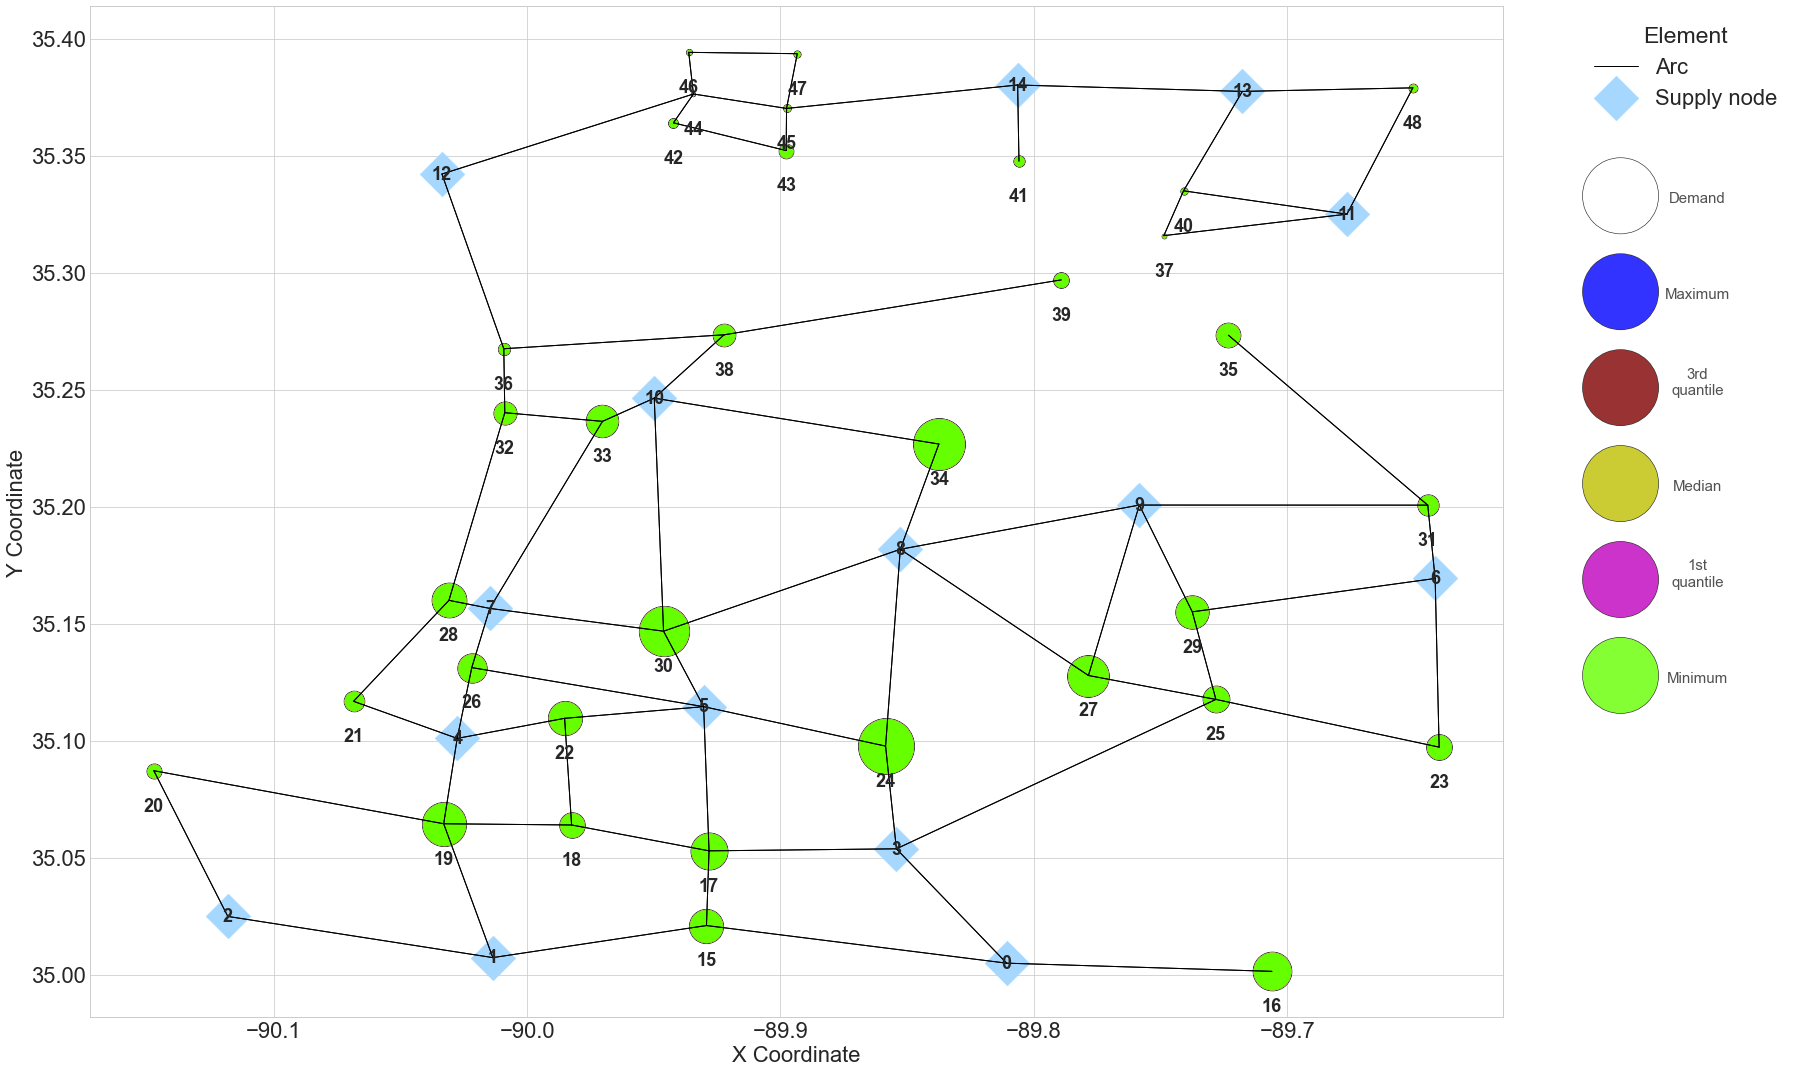

In [17]:
#WATER
for scarcity_level in scarce:
    print(f'\n------------{scarcity_level}------------')
    fig, ax = plt.subplots(figsize=(25, 15))
    colors = {'Gas': 'silver', 'Power': '#B2FFB2', 'Water': '#A6D8FF'}
    labels = {'Gas': [], 'Power': [], 'Water': []}
    label_done = {'Gas': {'S':False,'T':False,'D':False}, 'Power': {'S':False,'T':False,'D':False}, 'Water': {'S':False,'T':False,'D':False}}
    thy_size = 1000
    node_type = 'Water'
    max_demand_value = max_demand[node_type]
    base = 3000
    neon_green = [(0.4, 1.0, 0.0)]
    for number in list(water_allocation_data[scarcity_level]['node'])+supply_nodes[node_type]+transshipment_nodes[node_type]:

        x = x_coord[node_type][number]
        y = y_coord[node_type][number]
        
        if number in supply_nodes[node_type]:

            if not label_done[node_type]['S']:
                plt.scatter(x, y, marker='D', s=thy_size, color=colors[node_type], label = 'Supply node')
                label_done[node_type]['S'] = True
            else:
                plt.scatter(x, y, marker='D', s=thy_size, color=colors[node_type])

            plt.text(x, y, number, fontsize=18, ha='center', va='center',  weight='bold')

        elif number in transshipment_nodes[node_type]:
            if not label_done[node_type]['T']:
                plt.scatter(x, y, marker='s', s=thy_size, color=colors[node_type], label = 'Transshipment node')
                label_done[node_type]['T'] = True
            else:
                plt.scatter(x, y, marker='s', s=thy_size, color=colors[node_type])

            plt.text(x, y, number, fontsize=18, ha='center', va='center',  weight='bold')

        else:
        
            node_demand = demand[node_type][number]
            max_val = water_allocation_data[scarcity_level][water_allocation_data[scarcity_level]['node'] == number]['max']
            Q3 = water_allocation_data[scarcity_level][water_allocation_data[scarcity_level]['node'] == number]['q3']
            median = water_allocation_data[scarcity_level][water_allocation_data[scarcity_level]['node'] == number]['median']
            Q1 = water_allocation_data[scarcity_level][water_allocation_data[scarcity_level]['node'] == number]['q1']
            min_val = water_allocation_data[scarcity_level][water_allocation_data[scarcity_level]['node'] == number]['min']
        

            plt.scatter(x, y, marker='o', edgecolor='k', s= node_demand/max_demand_value*base, facecolor='white', linewidth = 2)
            plt.scatter(x, y, marker='o', s= max_val/max_demand_value*base , color='blue')
            plt.scatter(x, y, marker='o', s= Q3/max_demand_value*base, color='grey')
            plt.scatter(x, y, marker='o', s= median/max_demand_value*base, color='yellow')
            plt.scatter(x, y, marker='o', s= Q1/max_demand_value*base, color='magenta')
            plt.scatter(x, y, marker='o', s= min_val/max_demand_value*base, color=neon_green)
            
            plt.text(x, y-0.015, number, fontsize=18, ha='center', va='center',  weight='bold')


    # Plot lines connecting nodes from list A (in black)
    arc_label = False
    for arc in A_k[node_type]:

        start_node, end_node = arc
        start_x, start_y = x_coord[node_type][start_node], y_coord[node_type][start_node]
        end_x, end_y = x_coord[node_type][end_node], y_coord[node_type][end_node]

        if not arc_label:
            plt.plot([start_x, end_x], [start_y, end_y], linestyle = 'solid', color='black', linewidth = 1, label = 'Arc')
            arc_label = True
        else:
            plt.plot([start_x, end_x], [start_y, end_y], linestyle = 'solid', color='black', linewidth = 1)

    # Show the plot with legend
    legend = plt.legend(title='Element', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 22}, fontsize = 22)
    legend.get_title().set_fontsize(23)

    plt.tick_params(axis='x', labelsize=22)
    plt.xlabel('X Coordinate', fontsize = 22)
    plt.ylabel('Y Coordinate', fontsize = 22)
    plt.tick_params(axis='y', labelsize=22)
    #         plt.title(f"t = {t}, KKT solution", fontsize = 25)

    # Show the plot
    plt.grid(True)
    
    # Add the saved image to the center bottom of the figure
    img = plt.imread('results_label.png')
    # Calculate the position and size of the added image
    img_height = fig.bbox.height * 0.2  # Adjust the size as needed
    img_width = img_height * img.shape[1] / img.shape[0]
    img_x = fig.bbox.width - img_width/0.273
    img_y = (fig.bbox.y0 + fig.bbox.height)/2 *0.65  # Adjust the vertical position as needed
    
    # Add the image with adjusted position and size
    fig.figimage(img, xo=img_x, yo=img_y, origin='upper', alpha=0.8)  # Adjust alpha as needed

    
    # Adjust the layout to ensure everything fits properly
    plt.tight_layout()
    
#     fig.savefig(f'{node_type}_network_scarcity_level_{scarcity_level}_dispersion_on_map.pdf', format='pdf', bbox_inches = 'tight')
#     fig.savefig(f'{node_type}_network_scarcity_level_{scarcity_level}_dispersion_on_map.png', bbox_inches = 'tight')
    plt.show()
    